# Machine Learning classification for iAB by LS

This script is a comparison and an evaluation of 6 Machine Learning (ML) algorithms used for a classification task. The task is to detect "degradation zones" in images of movies of endothelial cells degrading a matrix of gelatin representing the extracellular matrix.

If you are a French speaker, the reading of the **report** `Report_Internship_iAB_Lucas` is highly recommended for the good understanding of this script. In this report you will discover the context of the study and how this script is built. You will also learn what is to improve (even if it's reminded all along the script). If you are not a French speacker you only need to know the basics of Machine Leanring and of Python. *Eva or Manue* will explain you the context and all you need to know must be described in the following script. 

You will find in the **report** `Report_Internship_iAB_Lucas`  other figures than the ones you will see with this version of the script. It is because some changes and tries were performed after the writing of the report. Also, as ML algorithm might include randomness, you can find different segmentations each time you launch the same ML algorithm.

**Watch out !** In the explanations the name "Cell" can refer both to the script box or to the biological cell.

**Contact me:** If you want to ask me something about the script you can contact me via :  
* lucas.sancere@phelma.grenoble-inp.fr 
* lucas.sancere@gmail.com  
* Whatsapp (+33) 6 47 43 50 85 

## I. Preparation of samples

### Cell 1: Imports

Importation of all necessary libraries.

In [1]:
"""
Created on Wed Apr 10 11:46:23 2019
@author: Lucas Sancéré
"""

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pickle 
import random
from random import randint
import seaborn as sns
from PIL import Image
import copy
from collections import defaultdict
from itertools import cycle
import time
from skimage.io import imread
import cv2
import conda
import imageio
import sklearn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Cell 2: Reading images on paths

Importation of images from degradation movies (Train + Test + Dev sets). The training set, the development set and the testing set are 3 sets of images used by ML algorithms for predictions (training + development) and  evaluations (testing). 
Please change the path (in red) according to the location of your files. 


***To improve :*** Creation of a loop for reading several images on the same folder. With one loop, read all the images you want. You have an example of this kind of loop in https://www.kaggle.com/keegil/keras-u-net-starter-lb-0-277 (paragraph "Get the data"). 

**Watch out !** All the images have to be centered (= registered). You have to avoid the shift due to the microscope between each images of the same movie. For that you have to center regarding the test image, for wich you will do a groundtruth (good segmentations of the images made by hand). For centering  the images of the movie, you can use ImageJ software with Registration Plugin (StackReg/Translation). This Plugin is an extra Plugin from EPFL, you have to download it : http://bigwww.epfl.ch/thevenaz/stackreg/.  

In [2]:
path_test_input_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Test_1_reg.tif'
path_test_input_1_prec =  'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Test_1_prec_reg.tif' 
path_test_input_1_cellGFP = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Test_1_reg_cellGFP.png' 
path_test_input_1_prec_cellGFP = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Test_1_prec_reg_cellGFP.png'
path_test_output_1 =  'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Test_Output_1.tif'
path_train_input_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Input_1_reg.tif' 
path_train_input_1_prec = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Input_1_prec_reg.tif'
path_train_output_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Output_1.tif'
path_train_input_2 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Input_2_reg.tif'
path_train_input_2_prec = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Input_2_prec_reg.tif'
path_train_output_2 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Train_Output_2.tif'
path_new_input_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Dev_Input_1.tif'
path_new_input_1_prec = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Dev_Input_1_prec.tif'
path_new_output_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Dev_Output_1.png'
path_matlab_output_1 = 'C:/Users/Lucas Sancéré/.spyder-py3/Input_3_Python/Matlab_Test_1_Output.tif'

# Important REMARK: The registration is done on imageJ with Registration Plugin (StackReg/Translation). The starting point  
# of the registration MUST be the image from wich the output is done. If not, Input and Output are shifted

test_input_1 = imread(path_test_input_1)
print ('dimension of the image', test_input_1.shape)
test_input_1_prec = imread(path_test_input_1_prec)    # Taken 140 minutes before test_input_1
print ('dimension of the precedent image', test_input_1_prec.shape)
test_output_1 = imread(path_test_output_1)

input_1 = imread(path_train_input_1) # train is not mentionned before input_1 to simplify the writting / test is mentionned in the name not train 
input_1_prec = imread(path_train_input_1_prec)  # Taken 3 * 140 minutes before input1
output_1 = imread(path_train_output_1)
input_2 = imread(path_train_input_2)
input_2_prec = imread(path_train_input_2_prec) #Taken [...]
output_2 = imread(path_train_output_2)
new_input_1 = imread(path_new_input_1)
new_input_1_prec = dev_input_1 = imread(path_new_input_1)
new_output_1 = imread(path_new_input_1_prec)
matlab_output_1 = imread(path_matlab_output_1)

dimension of the image (520, 696)
dimension of the precedent image (520, 696)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


### Cell 3.1: Creation and saving of test feature vector X (input image) for analysis :  function

ML algorithms won't directly use images for training, testing and developing. They will use features vectors (or descriptors). Each feature vector describes one pixel of the image, and the evolution of the pixel (gray level, gradient) regarding to the previous image.  
This cell corresponds to the loading of the function used to create these vectors.    

`extract_desc_G` creates a vector of 18 parameters for each pixel :
* 1. Graylevel, 2. Mean of greylevel of neighbors, 3. Variance of greylevel of neighbors    
* 4. Gradient, 5. Mean of gradient of neighbors, 6. Variance of gradient of neighbors  
* 7. , 8. , 9. , 10. , 11. , 12. The same for a previous image of the movie (time laps between both images has to be known)  
* 13. Difference between 7 and 1, 14. Difference between 8 and 2, 15. Difference between 9 and 3. The same for 16. 17. 18.  

`extract_desc_G_reduced` create a vector of 6 parameters for each pixel :  
* 1. Graylevel, 2. Mean of greylevel of neighbors, 3. Variance of greylevel of neighbors    
* 4. Gradient, 5. Mean of gradient of neighbors, 6. Variance of gradient of neighbors 

***To improve :*** It will be interesting to delete or add parameters in these features vectors and see how the segmentation will change. It will be useless to test differents weights on theses parameters a priori, because ML algorithms will put weights by themself.  

In [3]:
def extract_desc_G(i, j, imgG, imgGprec):
    
    
    if len(imgG.shape) == 3:
        imgG = imgG[:,:,0]
    if len(imgGprec.shape) == 3:
        imgGprec = imgGprec[:,:,0]
    

    sumGV, sum4VARGV, sul4VARGrad = 0, 0, 0
    #GradList = np.zeros((20,20))
   
    vec = []
    
    vec.append(imgG[i,j])
    vec.append(np.mean(imgG[i-5:i+6,j-5:j+6]))
    vec.append(np.var(imgG[i-5:i+6,j-5:j+6]))
    
    GradList = np.gradient(imgG[i-5:i+6,j-5:j+6])
    MagnGradList = ((GradList[0][:,:])**2 + (GradList[1][:,:])**2 )**0.5
    vec.append(MagnGradList[5,5])
    MeanGrad = np.mean(MagnGradList) 
    vec.append(MeanGrad)
    VarGrad = (MagnGradList[:,:] - MeanGrad)**2    
    MeanVarGrad = np.mean(VarGrad)    
    vec.append(MeanVarGrad)
    
    vec.append(imgGprec[i,j])
    vec.append(np.mean(imgGprec[i-5:i+6,j-5:j+6]))
    vec.append(np.var(imgGprec[i-5:i+6,j-5:j+6]))
    
    GradList = np.gradient(imgGprec[i-5:i+6,j-5:j+6])
    MagnGradList = ((GradList[0][:,:])**2 + (GradList[1][:,:])**2 )**0.5
    vec.append(MagnGradList[5,5])
    MeanGrad = np.mean(MagnGradList) 
    vec.append(MeanGrad)
    VarGrad = (MagnGradList[:,:] - MeanGrad)**2    
    MeanVarGrad = np.mean(VarGrad)    
    vec.append(MeanVarGrad)
    
    for k in range(0,6):
        vec.append(vec[k]-vec[k+6])
        
    return vec


def extract_desc_G_reduced(i, j, imgG):
    
    
    if len(imgG.shape) == 3:
        imgG = imgG[:,:,0]
        
    
    sumGV, sum4VARGV, sul4VARGrad = 0, 0, 0
    #GradList = np.zeros((20,20))
   
    vec = []
    
    vec.append(imgG[i,j])
    vec.append(np.mean(imgG[i-5:i+6,j-5:j+6]))
    vec.append(np.var(imgG[i-5:i+6,j-5:j+6]))
    
    GradList = np.gradient(imgG[i-5:i+6,j-5:j+6])
    MagnGradList = ((GradList[0][:,:])**2 + (GradList[1][:,:])**2 )**0.5
    vec.append(MagnGradList[5,5])
    MeanGrad = np.mean(MagnGradList) 
    vec.append(MeanGrad)
    VarGrad = (MagnGradList[:,:] - MeanGrad)**2    
    MeanVarGrad = np.mean(VarGrad)    
    vec.append(MeanVarGrad)
    
    return vec

### Cell 3.2: Creation and saving of test feature vector X (input image) for analysis : saving

Creation of features vectors for test images (only one for the moment). Features vectors are columns of one big matrix. This matrix can be save in a folder using pickel.dump function. Please change the path (in red) according to the location of your folders.

In [4]:
FV_X_test = []
# Creation of feature_vector X_test
for i in range (12,520-12):
    for j in range (12,696-12):
        FV_X_test.append(extract_desc_G(i, j, test_input_1,test_input_1_prec))
#           FV_X_test.append(extract_desc_G_reduced(i, j, test_input_1))
        
# Save the vectors
path0 = 'C:/Users/Lucas Sancéré/Desktop/feature_vect_unique_reduced//feature_vect_unique_reduced.pkl'
pickle.dump(FV_X_test,open(path0, 'wb'))                     

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in ubyte_scalars


### Cell 3.3: Recovering of pickled object ***if already created***  

If a Python object takes too much time to be created, and you don't want to create it each time you launch the whole algorithm, one possibility is to save it the fisrt time and recover it nexts times. This cell is for the recovering of the matrix of test features vectors. Don't launch this cell if the object is not already created.  
Please change the path (in red) according to the location of your folder.

In [5]:
with open('C:/Users/Lucas Sancéré/Desktop/feature_vect_unique/feature_vect.pkl', "rb") as f:
    FV_X_test = pickle.load(f)
FV_X_test = FV_X_test[1:,:]
len(FV_X_test)

333312

### Cell 3.4: Creation of test feature vector Y (handmade output) for analysis

In the training, developing and testing sets you have 2 kinds of images (so 2 kinds of features vectors). You have the images of the movie you want the algorithm to learn, and the corresponding groundtruths, wich are the good segmentations of the images made by hand.  
This cell creates the features vectors Y wich describe groundtruth images of test set (only one for the moment).


In [6]:
# Creation of feature_vector Y_test
if len(test_output_1.shape) == 3:
        test_output_1 = test_output_1[:,:,0]
FV_Y_test = []
for i in range (12,520-12):
    for j in range (12,696-12):
        if test_output_1[i,j] != 128:                    
            FV_Y_test.append(test_output_1[i,j]) 
        else:
            FV_Y_test.append(255)  
        
FV_Y_test = np.asarray(FV_Y_test)
# Note : np.asarray is often used in this algorithm. It transform lists into arrays because you can't perform
# the same modifications on these two objects

## II. Unsupervised Algorithm

### Cell 1.1: Loop on K-Means algorithm

Predictions of K-Means Unsupervised ML algorithm performing from 2 to 10 clusters (so 9 differents K-Means). Saving of the prediciton.  
Please change the path (in red) according to the location of your folder.

In [7]:
# Kmeans algorithm (to describe more)

KMEANS_Labels = dict() 
for N in range (2,11):
    k_means = KMeans(n_clusters = N, algorithm='full')
    k_means.fit(FV_X_test)
    KMEANS_Labels[N] = k_means.labels_

# # Save KMEANS_Labels dictionnary
path1 = 'C:/Users/Lucas Sancéré/Desktop/KMEANS_Labels/KMEANS_Labels'
pickle.dump(KMEANS_Labels,open(path1, 'wb'))  

### Cell 1.2: Recovering of pickled object ***if already created***

See ***I.3.3***. This cell is for the recovering of K-Means predictions vetors. 

In [7]:
with open('C:/Users/Lucas Sancéré/Desktop/KMEANS_Labels/KMEANS_Labels', "rb") as f:
    KMEANS_Labels = pickle.load(f)

### Cell 1.3: Find the class associated to degadation for each Kmeans and binarization

K-Means leads to a classification of each pixel into K categories (here K is between 2 and 10). But you don't know wich one categorized the degradation. This cell find wich class is associated to degradation zones and binarized the image once the class found. 

In [8]:
KMEANS_Labels_binarized = copy.deepcopy(KMEANS_Labels)  # For the explanation of deepcopy() please read
# https://stackoverflow.com/questions/2465921/how-to-copy-a-dictionary-and-only-edit-the-copy

KMEANS_Labels_TPR = dict() # TPR stands for True Positive Rate 

higher_rate = 0
total_count = 0 
true_positive_count = 0
value_of_class_degr = 0
True_Positive_Rate_KMEANS = 0
True_Positive_RateS_KMEANS = []

for N in range (2,11):
    for j in range (0,N):
        for i in range(0,len(KMEANS_Labels[N])):
            if KMEANS_Labels[N][i] == j:
                total_count += 1
            if KMEANS_Labels[N][i] == j and FV_Y_test[i] == 255:
                true_positive_count += 1
        True_Positive_Rate_KMEANS = (true_positive_count / total_count) 
        True_Positive_RateS_KMEANS.append(True_Positive_Rate_KMEANS)
        if True_Positive_Rate_KMEANS > higher_rate:
            higher_rate = True_Positive_Rate_KMEANS
            value_of_class_degr = j
        total_count = 0 
        true_positive_count = 0 
    KMEANS_Labels_TPR[N] = np.asarray(True_Positive_RateS_KMEANS)
    True_Positive_RateS_KMEANS = []
    for k in range(0,len(KMEANS_Labels[N])):                      #You need the first loop in i to totally end before entering in this one. It's the reason why you can't delete this line
        if  KMEANS_Labels[N][k] == value_of_class_degr:
                KMEANS_Labels_binarized[N][k] = 255
        else:
                KMEANS_Labels_binarized[N][k] = 0
            

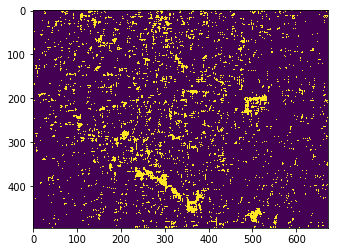

In [9]:
plt.imshow(KMEANS_Labels_binarized[8].reshape(496,672))

## III. Supervised Algorithms 

### Cell 1.1: Creation and saving of train features vectors

Creation of features vectors for training images : images of movies and associated groundthruth (only two pairs of images for the moment). Features vectors are columns of one big matrix. Matrices created can be saved in a folder using pickel.dump function. Please change the path (in red) according to the location of your folders.

In [11]:
FV_X_train = []
FV_Y_train = []
FV_X_train_2 = []
FV_Y_train_2 = []

for i in range (12,520-12):
    for j in range (12,696-12):
        FV_X_train.append(extract_desc_G(i, j, input_1,input_1_prec))
        FV_Y_train.append(output_1[i,j]) 
        FV_X_train_2.append(extract_desc_G(i, j, input_2,input_2_prec))
        FV_Y_train_2.append(output_2[i,j,0]) 
    print('i=',i)

FV_X_train = np.asarray(FV_X_train)
FV_Y_train = np.asarray(FV_Y_train)
FV_X_train_2 = np.asarray(FV_X_train_2)
FV_Y_train_2 = np.asarray(FV_Y_train_2)


# Save vectors
path3 = 'C:/Users/Lucas Sancéré/Desktop/FV_X_train/feature_vect_Xtrain.pkl'
path4 = 'C:/Users/Lucas Sancéré/Desktop/FV_Y_train/feature_vect_Ytrain.pkl'
path5 = 'C:/Users/Lucas Sancéré/Desktop/FV_X_train_2/feature_vect_Xtrain_2.pkl'
path6 = 'C:/Users/Lucas Sancéré/Desktop/FV_Y_train_2/feature_vect_Ytrain_2.pkl'
pickle.dump(FV_X_train,open(path3, 'wb'))    
pickle.dump(FV_Y_train,open(path4, 'wb'))
pickle.dump(FV_X_train_2,open(path5, 'wb'))    
pickle.dump(FV_Y_train_2,open(path6, 'wb'))

### Cell 1.2: Recovering of pickled object ***if already created***

See ***I.3.3***. This cell is for the recovering of the matrix of training features vectors.

In [10]:

with open('C:/Users/Lucas Sancéré/Desktop/FV_X_train/feature_vect_Xtrain.pkl', "rb") as f1:
    FV_X_train = pickle.load(f1)
Lenght1 = len(FV_X_train)

with open('C:/Users/Lucas Sancéré/Desktop/FV_Y_train/feature_vect_Ytrain.pkl', "rb") as f2:
    FV_Y_train = pickle.load(f2)
Lenght2 = len(FV_Y_train)

with open('C:/Users/Lucas Sancéré/Desktop/FV_X_train_2/feature_vect_Xtrain_2.pkl', "rb") as f3:
    FV_X_train_2 = pickle.load(f3)
Lenght3 = len(FV_X_train_2)

with open('C:/Users/Lucas Sancéré/Desktop/FV_Y_train_2/feature_vect_Ytrain_2.pkl', "rb") as f4:
    FV_Y_train_2 = pickle.load(f4)
Lenght4 = len(FV_Y_train_2)


### Cell 2 : Organisation of dataset in order to perform supervised ML (reduced data)

In our images, we have many more non-degradation zones than degradation zones. So we give as training to the algorithm many more features vectors corresponding to non-degradation zones than degradation zones. It can create a bias. If one category is much more represented, the algorithm can take it as a too significant information. One solution is to give to the algorithm the same number of vectors of degradation zones than vectors of non-degradation zones. This cell order the training vectors in this way.  
Furthermore, with less vectors the prediction will be faster. 

***To improve :*** It might be interesting to quantify the differences between the training with all data and the training with reduced data (50% degradation zones and 50% non degradation zones). For some algorithms, performing training with all data might lead to better predictions.

In [11]:
## Creation of new training feature vectors with same number of vector of degradation pixels and no-degradation pixels

if len(FV_Y_train.shape) == 3:
    FV_Y_train = FV_Y_train[:,0]
if len(FV_Y_train_2.shape) == 3:
    FV_Y_train_2 = FV_Y_train_2[:,0]

#Step 1: Creation of vector containing all the indexes of pixels corresponding to degradation area
K = 0
positive_indexes = []
positive_indexes_2 = [] 
for i in range(0,len(FV_Y_train)):
    if FV_Y_train[i] != 0 :
        FV_Y_train[i] = 255
        positive_indexes.append(i)
        K += 1 
    if FV_Y_train_2[i] != 0 :
        FV_Y_train_2[i] = 255
        positive_indexes_2.append(i)
        K += 1 
          
positive_indexes_all = np.concatenate((positive_indexes, positive_indexes_2), axis=None)
        
        
#Step 2: Creation of vector containing indexes of pixels corresponding to no-degradation area, same number 
# of indexes than the previous one     
some_negative_indexes = []
some_negative_indexes_2 = []
while (len(some_negative_indexes) + len(some_negative_indexes_2)) <= len(positive_indexes_all):
    rd =  randint(0, len(FV_Y_train))
    if FV_Y_train[rd] == 0:
        some_negative_indexes.append(rd)
    if FV_Y_train_2[rd] == 0:  
        some_negative_indexes_2.append(rd)
#         some_negative_indexes.add(rd)
        
    
#Step 3: Concatenation of these two vectors for having a vector containing all the indexes of interest
positive_indexes = np.asarray(positive_indexes)
some_negative_indexes = np.asarray(some_negative_indexes)
positive_indexes_2 = np.asarray(positive_indexes)
some_negative_indexes_2 = np.asarray(some_negative_indexes)

verif1 = len(positive_indexes)
verif2 = len(some_negative_indexes)
verif3 = len(positive_indexes_2)
verif4 = len(some_negative_indexes_2)


indexes_new_FV = np.concatenate((positive_indexes, some_negative_indexes), axis=None)
indexes_new_FV_2 = np.concatenate((positive_indexes_2, some_negative_indexes_2), axis=None)


#Step 4: Creation of new training feature vectors corresponding to the pixels(indexes) previously selected
Reduced_FV_X_train = []
Reduced_FV_Y_train = []
for i in indexes_new_FV:
    Reduced_FV_X_train.append(FV_X_train[i,:])
    Reduced_FV_Y_train.append(FV_Y_train[i])
for i in  indexes_new_FV_2:
    Reduced_FV_X_train.append(FV_X_train_2[i,:])
    Reduced_FV_Y_train.append(FV_Y_train_2[i])

# Reduced_FV_X_train = np.asarray([FV_X_train[i,:] for i in indexes_new_FV])    
Reduced_FV_X_train = np.asarray(Reduced_FV_X_train)
Reduced_FV_Y_train = np.asarray(Reduced_FV_Y_train)


### Cell(s) 3: Logistic Regression

Perform Logistic Regression Classification. The training is done with full data in the first cells and with reduced data in the lasts cells.  
The algorithm is described here : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

**Watch out !** The name "Logistic Regression" is confusing because this is a ML algortihm used for *classification* and not for *regression*. 

In [12]:
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#LR with Full data

FV_X_train_tot = np.concatenate((FV_X_train, FV_X_train_2),axis=None)
FV_X_train_tot = FV_X_train_tot.reshape(666624,18)
FV_Y_train_tot = np.concatenate((FV_Y_train, FV_Y_train_2),axis=None)                                                                                            

LogiReg = LogisticRegression(random_state=0, solver='saga', multi_class = 'multinomial', max_iter=5000).fit(FV_X_train_tot, FV_Y_train_tot)

# FV_X_train, FV_X_train_2, FV_Y_train, FV_Y_train_2 = np.asarray(FV_X_train), np.asarray(FV_X_train_2), np.asarray(FV_Y_train), np.asarray(FV_Y_train_2)

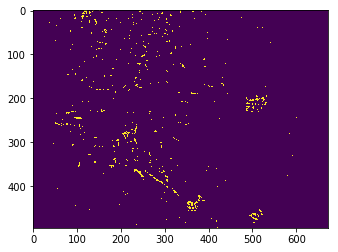

In [13]:
#Prediction, Prediction proba, Score of LR with Full data

LogiReg_predict = LogiReg.predict(FV_X_test)
LogiReg_predict_toshow = LogiReg_predict.reshape(496,672)
LogiReg_predict_proba = LogiReg.predict_proba(FV_X_test)
LogiReg_predict_proba_reshape = LogiReg_predict_proba[:,0]
LogiReg_predict_proba_reshape = LogiReg_predict_proba_reshape.reshape(496,672)
LogiReg_score = LogiReg.score(FV_X_train_tot, FV_Y_train_tot)

plt.imshow(LogiReg_predict_toshow)

In [14]:
#LR with Reduced data and differents solvers 

LogiReg2 = LogisticRegression(random_state=0, solver='saga', multi_class = 'multinomial', max_iter=5000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)
LogiReg2_1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class = 'multinomial', max_iter=5000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)
LogiReg2_2 = LogisticRegression(random_state=0, solver='saga', multi_class = 'ovr', max_iter=5000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)
LogiReg2_3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class = 'ovr', max_iter=5000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)


In [15]:
#Predictions, Predictions proba, Scores of LRs with Reduced data and differents solvers 

LogiReg2_predict = LogiReg2.predict(FV_X_test)
LogiReg2_predict_toshow = LogiReg2_predict.reshape(496,672)
LogiReg2_predict_proba = LogiReg2.predict_proba(FV_X_test) 
LogiReg2_predict_proba_reshape = LogiReg2_predict_proba[:,0]
LogiReg2_predict_proba_reshape = LogiReg2_predict_proba_reshape.reshape(496,672)
LogiReg2_score = LogiReg2.score(Reduced_FV_X_train, Reduced_FV_Y_train)

LogiReg2_1_predict = LogiReg2_1.predict(FV_X_test)
LogiReg2_1_predict_toshow = LogiReg2_1_predict.reshape(496,672)
LogiReg2_1_predict_proba = LogiReg2_1.predict_proba(FV_X_test)
LogiReg2_1_predict_proba_reshape = LogiReg2_1_predict_proba[:,0]
LogiReg2_1_predict_proba_reshape = LogiReg2_1_predict_proba_reshape.reshape(496,672)
LogiReg2_1_score = LogiReg2_1.score(Reduced_FV_X_train, Reduced_FV_Y_train)

LogiReg2_2_predict = LogiReg2_2.predict(FV_X_test)
LogiReg2_2_predict_toshow = LogiReg2_2_predict.reshape(496,672)
LogiReg2_2_predict_proba = LogiReg2_2.predict_proba(FV_X_test) 
LogiReg2_2_predict_proba_reshape = LogiReg2_2_predict_proba[:,0]
LogiReg2_2_predict_proba_reshape = LogiReg2_2_predict_proba_reshape.reshape(496,672)
LogiReg2_2_score = LogiReg2_2.score(Reduced_FV_X_train, Reduced_FV_Y_train)

LogiReg2_3_predict = LogiReg2_3.predict(FV_X_test)
LogiReg2_3_predict_toshow = LogiReg2_3_predict.reshape(496,672)
LogiReg2_3_predict_proba = LogiReg2_3.predict_proba(FV_X_test) 
LogiReg2_3_predict_proba_reshape = LogiReg2_3_predict_proba[:,0]
LogiReg2_3_predict_proba_reshape = LogiReg2_3_predict_proba_reshape.reshape(496,672)
LogiReg2_3_score = LogiReg2_3.score(Reduced_FV_X_train, Reduced_FV_Y_train)


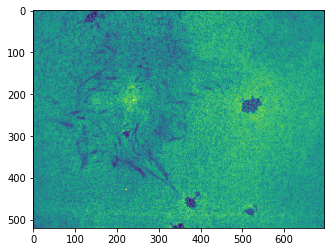

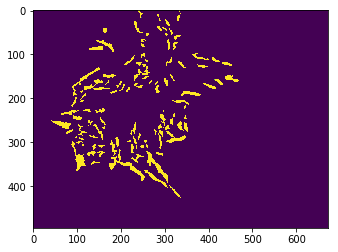

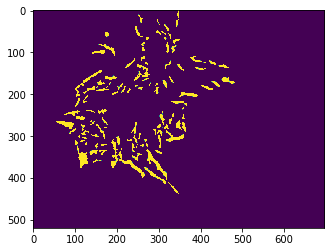

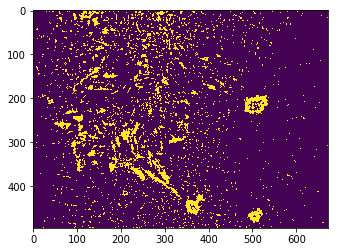

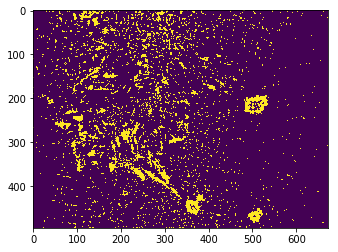

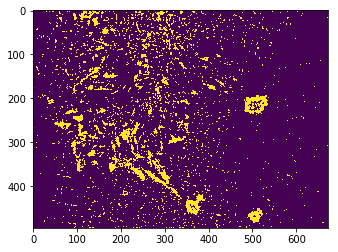

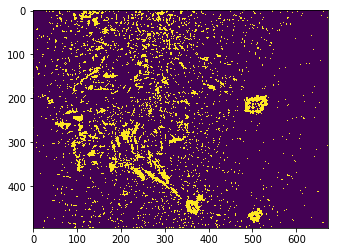

In [16]:
plt.figure() 
plt.imshow(test_input_1)
plt.figure()
plt.imshow(FV_Y_test.reshape(496,672))
plt.figure()
plt.imshow(test_output_1)
plt.figure()
plt.imshow(LogiReg2_predict_toshow)
plt.figure() 
plt.imshow(LogiReg2_1_predict_toshow)
plt.figure() 
plt.imshow(LogiReg2_2_predict_toshow)
plt.figure() 
plt.imshow(LogiReg2_3_predict_toshow)

### Cell(s) 4: Perceptron

Perform Perceptron Classification. The training is done with reduced data.  
The algorithm is described here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [17]:
#Perceptron (Quadtrtic Discriminant Analysis) with Reduced data 

Perceptron_NoPena = sklearn.linear_model.Perceptron(penalty=None, random_state=0).fit(Reduced_FV_X_train, Reduced_FV_Y_train) # I already have in memory one object called Perceptron it's the reason why I wrote the entire explicit call of the function Perceptron
Perceptron_L1Pena = sklearn.linear_model.Perceptron(penalty='l1', random_state=0).fit(Reduced_FV_X_train, Reduced_FV_Y_train) 
Perceptron_L2Pena = sklearn.linear_model.Perceptron(penalty='l2', random_state=0).fit(Reduced_FV_X_train, Reduced_FV_Y_train) 
Perceptron_ElasticnetPena = sklearn.linear_model.Perceptron(penalty='elasticnet', random_state=0).fit(Reduced_FV_X_train, Reduced_FV_Y_train) 

#Warnings will appear but it's just remarks 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol

In [18]:
#Predictions,  Scores of Perceptron with Reduced data and differents solvers 

Perceptron_NoPena_predict = Perceptron_NoPena.predict(FV_X_test)
Perceptron_NoPena_predict_toshow = Perceptron_NoPena_predict.reshape(496,672)
Perceptron_NoPena_score = Perceptron_NoPena.score(Reduced_FV_X_train, Reduced_FV_Y_train)

Perceptron_L1Pena_predict = Perceptron_L1Pena.predict(FV_X_test)
Perceptron_L1Pena_predict_toshow = Perceptron_L1Pena_predict.reshape(496,672)
Perceptron_L1Pena_score = Perceptron_L1Pena.score(Reduced_FV_X_train, Reduced_FV_Y_train)

Perceptron_L2Pena_predict = Perceptron_L2Pena.predict(FV_X_test)
Perceptron_L2Pena_predict_toshow = Perceptron_L2Pena_predict.reshape(496,672)
Perceptron_L2Pena_score = Perceptron_L2Pena.score(Reduced_FV_X_train, Reduced_FV_Y_train)

Perceptron_ElasticnetPena_predict = Perceptron_ElasticnetPena.predict(FV_X_test)
Perceptron_ElasticnetPena_predict_toshow = Perceptron_ElasticnetPena_predict.reshape(496,672)
Perceptron_ElasticnetPena_score = Perceptron_ElasticnetPena.score(Reduced_FV_X_train, Reduced_FV_Y_train)


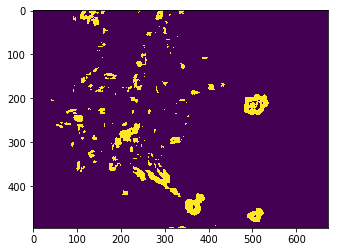

In [19]:
plt.imshow(Perceptron_NoPena_predict_toshow)

### Cell 5: Quadratic Discriminant Analysis

Perform Quadratic Discriminant Analysis Classification. The training is done with reduced data.   
The algorithm is described here : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

In [20]:
#QDA (Quadtrtic Discriminant Analysis) with Reduced data 

QDA = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=False, tol=0.0001).fit(Reduced_FV_X_train, Reduced_FV_Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [21]:
#Predictions, Predictions proba, Scores of QDA with Reduced data 

QDA_predict = QDA.predict(FV_X_test)
QDA_predict_toshow = QDA_predict.reshape(496,672)
QDA_predict_proba = QDA.predict_proba(FV_X_test) 
QDA_predict_proba_reshape = QDA_predict_proba[:,0]
QDA_predict_proba_reshape = QDA_predict_proba_reshape.reshape(496,672)
QDA_score = QDA.score(Reduced_FV_X_train, Reduced_FV_Y_train)


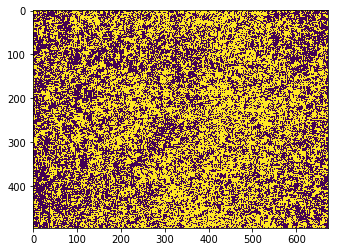

In [28]:
plt.imshow(QDA_predict_toshow)

### Cell 6: Random Forest Classifier

Perform Random Forest Classification. The training is done with reduced data. 

***To improve :*** Create a development set (using my images or new images and draw by hand new groundtruths). This development set will be used to find the best hyperparameters of Random Forest, and so, the best possible statistical model of preditcion. Hyperparameters are explained on the documentation of random forest function https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. This article may also help you (I didn't read it) : https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6. 

**Watch out !** As Random Forest and Multilayer Perceptron are the best algorithms for our task, you have first to focus on finding the hyperparameters for these two algorithms. 

In [22]:
#Random Forest with Reduced data 

Random_Forest = RandomForestClassifier(n_estimators = 1000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)

In [23]:
#Predictions, Predictions proba, Scores of Random Forest with Reduced data and differents solvers 

Random_Forest_predict = Random_Forest.predict(FV_X_test)
Random_Forest_predict_toshow = Random_Forest_predict.reshape(496,672)
Random_Forest_predict_proba = Random_Forest.predict_proba(FV_X_test) 
Random_Forest_predict_proba_reshape = Random_Forest_predict_proba[:,0]
Random_Forest_predict_proba_reshape = Random_Forest_predict_proba_reshape.reshape(496,672)
Random_Forest_score = Random_Forest.score(Reduced_FV_X_train, Reduced_FV_Y_train)


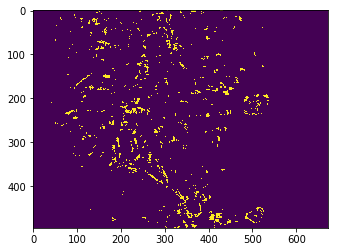

In [24]:
plt.imshow(Random_Forest_predict_toshow)

### Cell 7: Multilayer Perceptron

Perform Multilayer Perceptron Classification. The training is done with reduced data. 

***To improve :*** Create a development set (using my images or new images and draw by hand new groundtruths). This development set will be use to find the best hyperparameters of Multilayer Perceptron, and so, the best possible statistical model of preditcion.  
Hyperparameters are explained on the documentation of multilayer perceptron function https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.  
This page may also help you (I didn't read it) : https://scikit-learn.org/stable/modules/grid_search.html. 

**Watch out !** As Random Forest and Multilayer Perceptron are the best algorithms for our task, you have first to focus on finding the hyperparameters for these two algorithms. 

In [25]:
#Multilayer Perceptron with Reduced data 

Multilayer_Perceptron =  MLPClassifier(alpha=1, max_iter=1000).fit(Reduced_FV_X_train, Reduced_FV_Y_train)

In [26]:
#Predictions, Predictions proba, Scores of Multilayer Perceptron with Reduced data and differents solvers 

Multilayer_Perceptron_predict = Multilayer_Perceptron.predict(FV_X_test)
Multilayer_Perceptron_predict_toshow = Multilayer_Perceptron_predict.reshape(496,672)
Multilayer_Perceptron_predict_proba = Multilayer_Perceptron.predict_proba(FV_X_test) 
Multilayer_Perceptron_predict_proba_reshape = Multilayer_Perceptron_predict_proba[:,0]
Multilayer_Perceptron_predict_proba_reshape = Multilayer_Perceptron_predict_proba_reshape.reshape(496,672)
Multilayer_Perceptron_score = Multilayer_Perceptron.score(Reduced_FV_X_train, Reduced_FV_Y_train)

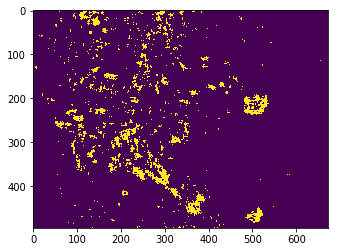

In [27]:
plt.imshow(Multilayer_Perceptron_predict_toshow)

## IV. Evaluations of ML algorithms and selection of the best one

### Cell 0: F-mesure and random classification

For the evaluation of the segmentations of the images (classification of the pixels), we need to define a metric of evaluation. This metric is the F-mesure. If your are a french speaker you can read the description of F-Mesure on the **report** `Report_Internship_iAB_Lucas` provided, if not, this metric is explained here https://en.wikipedia.org/wiki/Precision_and_recall. 

For being able to compare and evaluate our segmentations, knowing the value of the F-mesure for a random segmentation will help.  
For a random segmentation, $F_1 = \frac{p}{0,5 + p}$ with $p = $ proportion of real degradation pixels on the total number of pixels (you access it via the groundtruth). For our testing set, the result is $F_1 = 0.079$. We will confront it to our segmentations. 

### Cell 1: Evaluation of KMEANS (with the best number of clusters) using F-mesure

Evaluation of the best K-MEANS (best number of clusters) with F-mesure, Precision and Recall. 

In [31]:
KMEANS_f1_scores = [0,0]
KMEANS_Recall_scores = [0,0]
KMEANS_Precision_scores = [0,0]


for N in range(2,11):
    KMEANS_f1_scores.append(f1_score(FV_Y_test, KMEANS_Labels_binarized[N], labels=[255], average=None))
    KMEANS_Recall_scores.append(recall_score(FV_Y_test, KMEANS_Labels_binarized[N], labels=[255], average=None))
    KMEANS_Precision_scores.append(precision_score(FV_Y_test, KMEANS_Labels_binarized[N], labels=[255], average=None))
    
                
KMEANS_f1_score_max_index = KMEANS_f1_scores.index(max(KMEANS_f1_scores))

KMEANS_f1_scores = np.asarray(KMEANS_f1_scores)
KMEANS_Recall_scores = np.asarray(KMEANS_Recall_scores)
KMEANS_Precision_scores = np.asarray(KMEANS_Precision_scores)

KMEANS_f1_score_max = max(KMEANS_f1_scores) 
KMEANS_Recall_for_f1_max = KMEANS_Recall_scores[KMEANS_f1_score_max_index]
KMEANS_Precision_for_f1_max = KMEANS_Precision_scores[KMEANS_f1_score_max_index]


print('The F1 score for the best KMEANS (obtained with %d clusters) = ' %KMEANS_f1_score_max_index, KMEANS_f1_score_max)
print('Recall obtained for the best KMEANS = ', KMEANS_Recall_for_f1_max)
print('Precision obtained for the best KMEANS = ', KMEANS_Precision_for_f1_max)
# Calculate the false positive rate (fpr) and the true positive rate (tpr) for all thresholds of the classifications

The F1 score for the best KMEANS (obtained with 9 clusters) =  [0.19686917]
Recall obtained for the best KMEANS =  [0.23981805]
Precision obtained for the best KMEANS =  [0.16696711]


### Cell(s) 2: Evaluation of the best Logistic Regression and the best proba threshold with F-mesure

The firsts cells plot the Precision Vs Recall curve for Logistic Regression and store Precision and Recall
for each probability threshold values. Some supervised ML algorithms defined a probability thershold. This is the threshold among which the pixel will be associated to the category evaluated. *For example : if a pixel has 67% chance of belonging to "degradation zone" and the probability threshold is set to 50%, it will be classified as "degradation zone". If the probability threshold is set to 85%, it won't be classified as "degradation zone" but as "non degradation zone" as we are in a binary case.*

The following cells evaluate the F-mesure of Logistic Regression prediction on the testing set.  
It also calculates the best probability threshold on the testing set. The best probability threshold is the probability threshold leading to the best prediction regarding the F-mesure. Calculate it from the testing set is a bias reported in the **report** `Report_Internship_iAB_Lucas`. The best probability threshold must be caclulated on the development set. It includes a calcul of the F-mesure also on the development set and not only on the testing set (evaluation).  

***To improve :*** Use the development set and the F-mesure to find the best hyperparameters of Logistic Regression (so the best model) for our task and to find the best probability threshold. 

In [32]:
#Caclulation of precision vs recall curve 

LR_precision, LR_recall, LR_thresholds = precision_recall_curve(FV_Y_test, LogiReg_predict_proba[:,1], pos_label=255, sample_weight=None)
LR2_0_precision, LR2_0_recall, LR2_0_thresholds = precision_recall_curve(FV_Y_test, LogiReg2_predict_proba[:,1], pos_label=255, sample_weight=None)
LR2_1_precision, LR2_1_recall, LR2_1_thresholds = precision_recall_curve(FV_Y_test, LogiReg2_1_predict_proba[:,1], pos_label=255, sample_weight=None)
LR2_2_precision, LR2_2_recall, LR2_2_thresholds = precision_recall_curve(FV_Y_test, LogiReg2_2_predict_proba[:,1], pos_label=255, sample_weight=None)
LR2_3_precision, LR2_3_recall, LR2_3_thresholds = precision_recall_curve(FV_Y_test, LogiReg2_3_predict_proba[:,1], pos_label=255, sample_weight=None)



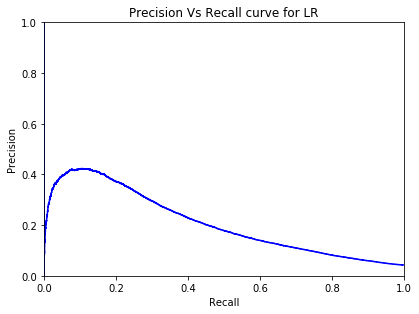

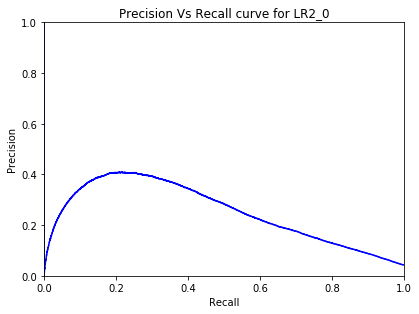

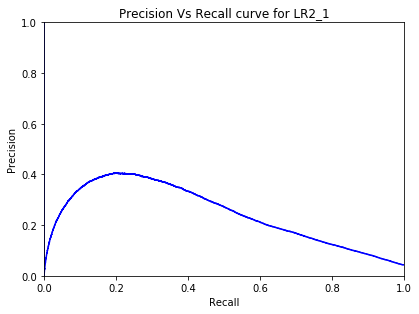

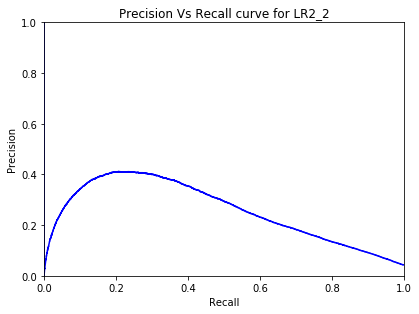

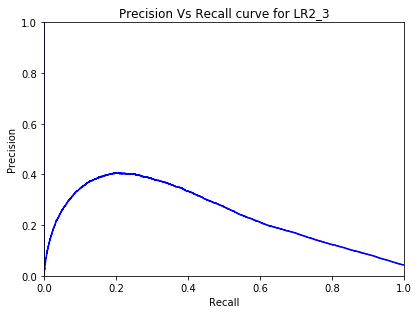

In [33]:
#PLot all the curve


figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR_recall, LR_precision, 'b')
plt.title('Precision Vs Recall curve for LR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 2)
plt.plot(LR2_0_recall, LR2_0_precision, 'b')
plt.title('Precision Vs Recall curve for LR2_0')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 3)
plt.plot(LR2_1_recall, LR2_1_precision, 'b')
plt.title('Precision Vs Recall curve for LR2_1')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 4)
plt.plot(LR2_2_recall, LR2_2_precision, 'b')
plt.title('Precision Vs Recall curve for LR2_2')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 5)
plt.plot(LR2_3_recall, LR2_3_precision, 'b')
plt.title('Precision Vs Recall curve for LR2_3')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()



In [34]:
#Calculation of f1 score for precision/recall pairs at each proba thresholds for each LR 

LR_f1_scores = []
LR2_0_f1_scores = []
LR2_1_f1_scores = []
LR2_2_f1_scores = []
LR2_3_f1_scores =[]


for i in range(0,len(LR_thresholds)):
    LR_f1_scores.append((2*(LR_precision[i] * LR_recall[i])) / (LR_precision[i] + LR_recall[i]))
for i in range(0,len(LR2_0_thresholds)):
    LR2_0_f1_scores.append((2*(LR2_0_precision[i] * LR2_0_recall[i])) / (LR2_0_precision[i] + LR2_0_recall[i]))
for i in range(0,len(LR2_1_thresholds)):
    LR2_1_f1_scores.append((2*(LR2_1_precision[i] * LR2_1_recall[i])) / (LR2_1_precision[i] + LR2_1_recall[i]))
for i in range(0,len(LR2_2_thresholds)):
    LR2_2_f1_scores.append((2*(LR2_2_precision[i] * LR2_2_recall[i])) / (LR2_2_precision[i] + LR2_2_recall[i]))
for i in range(0,len(LR2_3_thresholds)):
    LR2_3_f1_scores.append((2*(LR2_3_precision[i] * LR2_3_recall[i])) / (LR2_3_precision[i] + LR2_3_recall[i]))

    
LR_f1_score_max_index = LR_f1_scores.index(max(LR_f1_scores))
LR2_0_f1_score_max_index = LR2_0_f1_scores.index(max(LR2_0_f1_scores))
LR2_1_f1_score_max_index = LR2_1_f1_scores.index(max(LR2_1_f1_scores))
LR2_2_f1_score_max_index = LR2_2_f1_scores.index(max(LR2_2_f1_scores))
LR2_3_f1_score_max_index = LR2_3_f1_scores.index(max(LR2_3_f1_scores))    

LR_f1_scores = np.asarray(LR_f1_scores)
LR2_0_f1_scores = np.asarray(LR2_0_f1_scores)
LR2_1_f1_scores = np.asarray(LR2_1_f1_scores)
LR2_2_f1_scores = np.asarray(LR2_2_f1_scores)
LR2_3_f1_scores = np.asarray(LR2_3_f1_scores)

LR_f1_score_max = max(LR_f1_scores) 
LR2_0_f1_score_max = max(LR2_0_f1_scores) 
LR2_1_f1_score_max = max(LR2_1_f1_scores)
LR2_2_f1_score_max = max(LR2_2_f1_scores)
LR2_3_f1_score_max = max(LR2_3_f1_scores)

LR_f1_best_threshold = LR_thresholds[LR_f1_score_max_index]
LR2_0_f1_best_threshold = LR2_0_thresholds[LR2_0_f1_score_max_index] 
LR2_1_f1_best_threshold = LR2_1_thresholds[LR2_1_f1_score_max_index]
LR2_2_f1_best_threshold = LR2_2_thresholds[LR2_2_f1_score_max_index]
LR2_3_f1_best_threshold = LR2_3_thresholds[LR2_3_f1_score_max_index]



print('LR_f1_score_max = ',LR_f1_score_max)
print('LR2_0_f1_score_max = ', LR2_0_f1_score_max)
print('LR2_1_f1_score_max = ', LR2_1_f1_score_max)
print('LR2_2_f1_score_max = ', LR2_2_f1_score_max)
print('LR2_3_f1_score_max = ', LR2_3_f1_score_max)
print('LR_f1_best_threshold = ', LR_f1_best_threshold)
print('LR2_0_f1_best_threshold = ', LR2_0_f1_best_threshold)
print('LR2_1_f1_best_threshold = ', LR2_1_f1_best_threshold)
print('LR2_2_f1_best_threshold = ', LR2_2_f1_best_threshold)
print('LR2_3_f1_best_threshold = ', LR2_3_f1_best_threshold)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


LR_f1_score_max =  0.29892336922102597
LR2_0_f1_score_max =  0.3722670991485513
LR2_1_f1_score_max =  0.365080349941056
LR2_2_f1_score_max =  0.3779798476284099
LR2_3_f1_score_max =  0.3653798411122145
LR_f1_best_threshold =  0.19919516833895617
LR2_0_f1_best_threshold =  0.6848880523515906
LR2_1_f1_best_threshold =  0.6895724647601927
LR2_2_f1_best_threshold =  0.6711131425732131
LR2_3_f1_best_threshold =  0.689992568264962


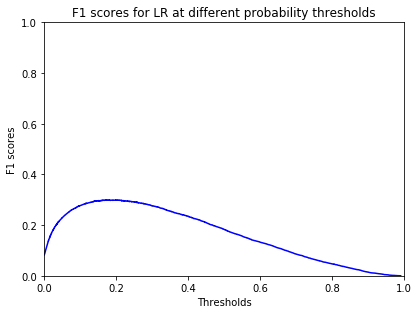

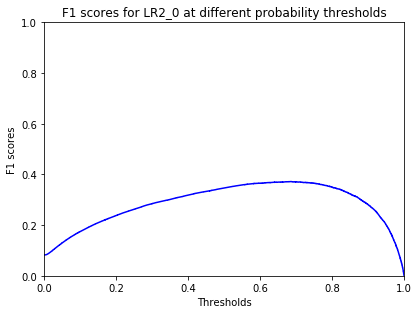

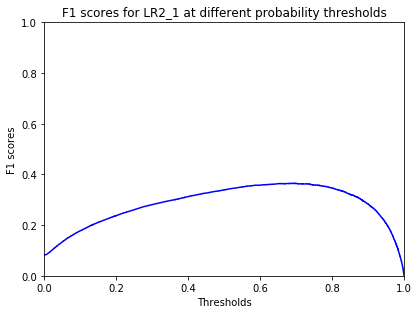

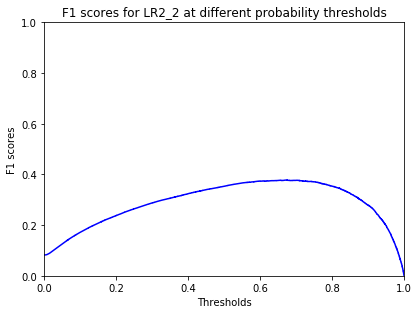

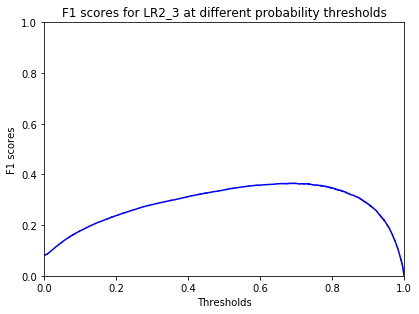

In [35]:
#Associated PLots

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR_thresholds, LR_f1_scores, 'b')
plt.title('F1 scores for LR at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR2_0_thresholds, LR2_0_f1_scores, 'b')
plt.title('F1 scores for LR2_0 at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()


figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR2_1_thresholds, LR2_1_f1_scores, 'b')
plt.title('F1 scores for LR2_1 at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()


figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR2_2_thresholds, LR2_2_f1_scores, 'b')
plt.title('F1 scores for LR2_2 at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()


figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.6, top = 2, wspace = 5, hspace = 0.1)
plt.subplot(5, 1, 1)
plt.plot(LR2_3_thresholds, LR2_3_f1_scores, 'b')
plt.title('F1 scores for LR2_3 at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()

### Cell 3: Evaluation of the best Perceptron with F-mesure

Evaluation of F-Mesure, Precision and Recall for Perceptron with different penalties.  
As there is no probability associated to the classification with Perceptron, there is no probability threshold.

In [36]:

#Calculation of f1 score for all perceptrons
Perceptron_NoPena_predict_f1_score = f1_score(FV_Y_test,Perceptron_NoPena_predict, labels=[255], average=None)
Perceptron_L1Pena_predict_f1_score = f1_score(FV_Y_test, Perceptron_L1Pena_predict, labels=[255], average=None)
Perceptron_L2Pena_predict_f1_score  = f1_score(FV_Y_test, Perceptron_L2Pena_predict, labels=[255], average=None)
Perceptron_ElasticnetPena_predict_f1_score = f1_score(FV_Y_test, Perceptron_ElasticnetPena_predict, labels=[255], average=None)

#Calculation of Recall for all perceptrons
Perceptron_NoPena_predict_recall = recall_score(FV_Y_test, Perceptron_NoPena_predict, labels=[255], average=None)
Perceptron_L1Pena_predict_recall = recall_score(FV_Y_test, Perceptron_L1Pena_predict, labels=[255], average=None)
Perceptron_L2Pena_predict_recall = recall_score(FV_Y_test, Perceptron_L2Pena_predict, labels=[255], average=None)
Perceptron_ElasticnetPena_predict_recall = recall_score(FV_Y_test, Perceptron_ElasticnetPena_predict, labels=[255], average=None)

#Calculation of Precision for all perceptrons
Perceptron_NoPena_predict_precision = precision_score(FV_Y_test, Perceptron_NoPena_predict, labels=[255], average=None)
Perceptron_L1Pena_predict_precision = precision_score(FV_Y_test, Perceptron_L1Pena_predict, labels=[255], average=None)
Perceptron_L2Pena_predict_precision = precision_score(FV_Y_test, Perceptron_L2Pena_predict, labels=[255], average=None)
Perceptron_ElasticnetPena_predict_precision = precision_score(FV_Y_test, Perceptron_ElasticnetPena_predict, labels=[255], average=None)



Perceptron_List_f1_scores = (Perceptron_NoPena_predict_f1_score, Perceptron_L1Pena_predict_f1_score, Perceptron_L2Pena_predict_f1_score, Perceptron_ElasticnetPena_predict_f1_score)
Perceptron_List_Recall = (Perceptron_NoPena_predict_recall, Perceptron_L1Pena_predict_recall, Perceptron_L2Pena_predict_recall, Perceptron_ElasticnetPena_predict_recall)
Perception_List_Precision = (Perceptron_NoPena_predict_precision, Perceptron_L1Pena_predict_precision, Perceptron_L2Pena_predict_precision, Perceptron_ElasticnetPena_predict_precision)

Pereceptron_f1_score_max_index = Perceptron_List_f1_scores.index(max(Perceptron_List_f1_scores))

Perceptron_Array_f1_scores = np.asarray(Perceptron_List_f1_scores)
Perceptron_Array_Recall = np.asarray(Perceptron_List_Recall)
Perceptron_Array_Precision = np.asarray(Perception_List_Precision)

Perceptron_f1_score_max = max(Perceptron_Array_f1_scores) 
Perceptron_Recall_for_f1_max = Perceptron_Array_Recall[Pereceptron_f1_score_max_index]
Perceptron_Precision_for_f1_max = Perceptron_Array_Precision[Pereceptron_f1_score_max_index]


print('The F1 score for the best Perceptron, obtained with Pena number %d (0:NoPena / 1:l1 / 2:l2 / 3:Elasticnet) = ' %Pereceptron_f1_score_max_index, Perceptron_f1_score_max)
print('Recall obtained for the best Perceptron = ', Perceptron_Recall_for_f1_max)
print('Precision obtained for the best Perceptron = ', Perceptron_Precision_for_f1_max)

The F1 score for the best Perceptron, obtained with Pena number 1 (0:NoPena / 1:l1 / 2:l2 / 3:Elasticnet) =  [0.35580147]
Recall obtained for the best Perceptron =  [0.67949615]
Precision obtained for the best Perceptron =  [0.24099675]


### Cell(s) 4: Evaluation of QDA and the best proba threshold with f mesure 

The first cell plots the Precision Vs Recall curve for QDA and store Precision and Recall
for each probability threshold values.

The second cell evaluate the F-mesure of QDA prediction on the testing set.  
It also calculte the best probability threshold on the testing set (biaised, see **IV.2**). 

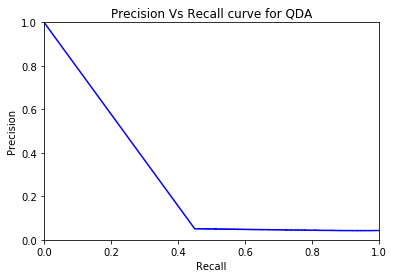

In [37]:
#To fill
QDA_precision, QDA_recall, QDA_thresholds = precision_recall_curve(FV_Y_test, QDA_predict_proba[:,1], pos_label=255, sample_weight=None)

#Plot figure
plt.plot(QDA_recall, QDA_precision, 'b')
plt.title('Precision Vs Recall curve for QDA')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


QDA_f1_score_max =  0.09109186301105772
QDA_f1_best_threshold =  0.9999999999999929


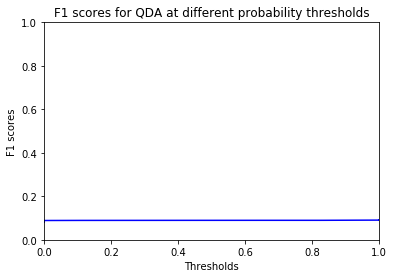

In [38]:
QDA_f1_scores = []

for i in range(0,len(QDA_thresholds)):
    QDA_f1_scores.append((2*(QDA_precision[i] * QDA_recall[i])) / (QDA_precision[i] + QDA_recall[i]))
    
QDA_f1_score_max_index = QDA_f1_scores.index(max(QDA_f1_scores))
QDA_f1_scores = np.asarray(QDA_f1_scores)
QDA_f1_score_max = max(QDA_f1_scores) 
QDA_f1_best_threshold = QDA_thresholds[QDA_f1_score_max_index]

print('QDA_f1_score_max = ',QDA_f1_score_max)
print('QDA_f1_best_threshold = ', QDA_f1_best_threshold)

plt.plot(QDA_thresholds, QDA_f1_scores, 'b')
plt.title('F1 scores for QDA at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()

### Cell(s) 5: Evaluation of Random Forest and of the best proba threshold using F-mesure

The first cell plots the Precision Vs Recall curve for Random Forest and store Precision and Recall
for each probability threshold values.

The second cell evaluate the F-mesure of Random Forest prediction on the testing set.  
It also calculte the best probability threshold on the testing set (biaised, see **IV.2**). 

***To improve :*** Use the development set and the F-mesure to find the best hyperparameters of Random Forest (so the best model) for our task and to find the best probability threshold. 

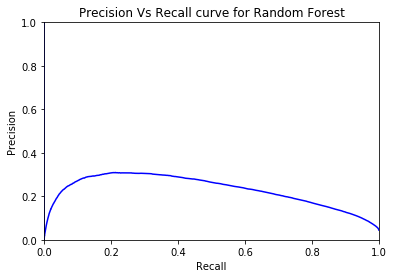

In [39]:
# PLot of Precision Vs Recall curve for Random Forest and storage of precision, recall
# for each proba threshold
Random_Forest_precision, Random_Forest_recall, Random_Forest_thresholds = precision_recall_curve(FV_Y_test, Random_Forest_predict_proba[:,1], pos_label=255, sample_weight=None)

#Plot figure
plt.plot(Random_Forest_recall, Random_Forest_precision, 'b')
plt.title('Precision Vs Recall curve for Random Forest')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Random_Forest_f1_score_max =  0.34676829114403257
Random_Forest_f1_best_threshold =  0.387


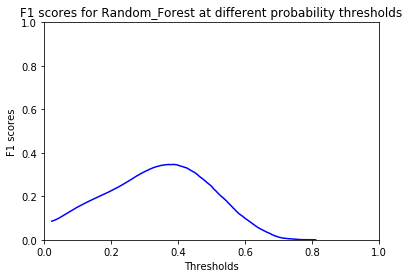

In [40]:
Random_Forest_f1_scores = []

for i in range(0,len(Random_Forest_thresholds)):
    Random_Forest_f1_scores.append((2*(Random_Forest_precision[i] * Random_Forest_recall[i])) / (Random_Forest_precision[i] + Random_Forest_recall[i]))
    
Random_Forest_f1_score_max_index = Random_Forest_f1_scores.index(max(Random_Forest_f1_scores))
Random_Forest_f1_scores = np.asarray(Random_Forest_f1_scores)
Random_Forest_f1_score_max = max(Random_Forest_f1_scores) 
Random_Forest_f1_best_threshold = Random_Forest_thresholds[Random_Forest_f1_score_max_index]

print('Random_Forest_f1_score_max = ',Random_Forest_f1_score_max)
print('Random_Forest_f1_best_threshold = ', Random_Forest_f1_best_threshold)

plt.plot(Random_Forest_thresholds, Random_Forest_f1_scores, 'b')
plt.title('F1 scores for Random_Forest at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()

### Cell(s) 6: Evaluation of Multilayer Perceptron and the best proba threshold using F-mesure

The first cell plots the Precision Vs Recall curve for Multilayer Perceptron and store Precision and Recall
for each probability threshold values.

The second cell evaluate the F-mesure of Mutlilayer Perceptron prediction on the testing set.  
It also calculate the best probability threshold on the testing set (biaised, see **IV.2**).

***To improve :*** Use the development set and the F-mesure to find the best hyperparameters of Multilayer Perceptron (so the best model) for our task and to find the best probability threshold. 

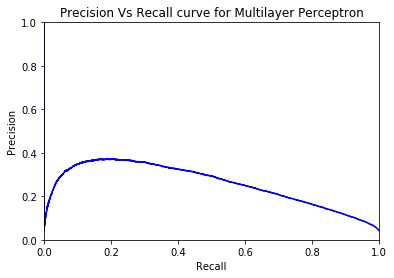

In [41]:
# PLot of Precision Vs Recall curve for Multilayer Perceptron and storage of precision, recall
# for each proba threshold
Multilayer_Perceptron_precision, Multilayer_Perceptron_recall, Multilayer_Perceptron_thresholds = precision_recall_curve(FV_Y_test, Multilayer_Perceptron_predict_proba[:,1], pos_label=255, sample_weight=None)

#Plot figure
plt.plot(Multilayer_Perceptron_recall, Multilayer_Perceptron_precision, 'b')
plt.title('Precision Vs Recall curve for Multilayer Perceptron')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Multilayer_Perceptron_f1_score_max =  0.3697042264285532
Multilayer_Perceptron_f1_best_threshold =  0.05861943031856785


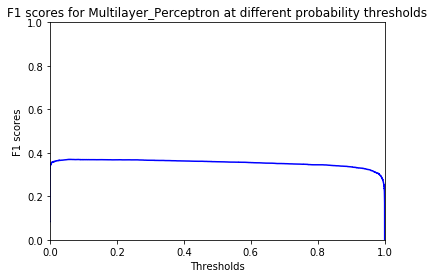

In [42]:
Multilayer_Perceptron_f1_scores = []

for i in range(0,len(Multilayer_Perceptron_thresholds)):
    Multilayer_Perceptron_f1_scores.append((2*(Multilayer_Perceptron_precision[i] *Multilayer_Perceptron_recall[i])) / (Multilayer_Perceptron_precision[i] + Multilayer_Perceptron_recall[i]))
    
Multilayer_Perceptron_f1_score_max_index = Multilayer_Perceptron_f1_scores.index(max(Multilayer_Perceptron_f1_scores))
Multilayer_Perceptron_f1_scores = np.asarray(Multilayer_Perceptron_f1_scores)
Multilayer_Perceptron_f1_score_max = max(Multilayer_Perceptron_f1_scores) 
Multilayer_Perceptron_f1_best_threshold = Multilayer_Perceptron_thresholds[Multilayer_Perceptron_f1_score_max_index]

print('Multilayer_Perceptron_f1_score_max = ',Multilayer_Perceptron_f1_score_max)
print('Multilayer_Perceptron_f1_best_threshold = ', Multilayer_Perceptron_f1_best_threshold)

plt.plot(Multilayer_Perceptron_thresholds, Multilayer_Perceptron_f1_scores, 'b')
plt.title('F1 scores for Multilayer_Perceptron at different probability thresholds')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('F1 scores')
plt.xlabel('Thresholds')
plt.show()

### Cell 7: Creation of images and vectors for the best predictions of each algorithm

Creation of images and vectors for the best prediction and best probability threshold of each algorithm.

In [45]:
#Creation of images and vectors for the best prediction of each algorithm

#KMEANS
KMEANS_predict_best = KMEANS_Labels_binarized[8]
KMEANS_predict_best_toshow = KMEANS_predict_best.reshape(496,672)

#Logistic Regression
Logistic_Regression_predict_best = []
for i in range(0, len(LogiReg2_2_predict_proba[:,1])):
    if LogiReg2_2_predict_proba[i,1] < LR2_2_f1_best_threshold :
            Logistic_Regression_predict_best.append(0)
    else:
            Logistic_Regression_predict_best.append(255)
Logistic_Regression_predict_best = np.asarray(Logistic_Regression_predict_best)
Logistic_Regression_predict_best_toshow = Logistic_Regression_predict_best.reshape(496,672)

#Perceptron
Perceptron_predict_best = Perceptron_NoPena_predict
Perceptron_predict_best_toshow = Perceptron_predict_best.reshape(496,672)

#QDA
QDA_predict_best = []
for i in range(0, len(QDA_predict_proba[:,0])):
#         if QDA_predict_proba[i,1] < QDA_f1_best_threshold :
    if QDA_predict_proba[i,1] < 0.5 :
           QDA_predict_best.append(0)
    else:
           QDA_predict_best.append(255)
QDA_predict_best = np.asarray(QDA_predict_best)
QDA_predict_best_toshow = QDA_predict_best.reshape(496,672)

#Random Forest 
Random_Forest_predict_best = []
for i in range(0, len(Random_Forest_predict_proba[:,0])):
#         if Random_Forest_predict_proba[i,1] < Random_Forest_f1_best_threshold :
    if Random_Forest_predict_proba[i,1] < 0.5 :
           Random_Forest_predict_best.append(0)
    else:
           Random_Forest_predict_best.append(255)
Random_Forest_predict_best = np.asarray(Random_Forest_predict_best)
Random_Forest_predict_best_toshow = Random_Forest_predict_best.reshape(496,672)

#Multilayer Perceptron
Multilayer_Perceptron_predict_best = []
for i in range(0, len(Multilayer_Perceptron_predict_proba[:,0])):
#         if Multilayer_Perceptron_predict_proba[i,1] < Multilayer_Perceptron_f1_best_threshold :
    if Multilayer_Perceptron_predict_proba[i,1] < 0.5 :
           Multilayer_Perceptron_predict_best.append(0)
    else:
           Multilayer_Perceptron_predict_best.append(255)
Multilayer_Perceptron_predict_best = np.asarray(Multilayer_Perceptron_predict_best)
Multilayer_Perceptron_predict_best_toshow = Multilayer_Perceptron_predict_best.reshape(496,672)

## V. Connected components, post-processing and evaluations after each step

### Cell 1.1: Blurring: creation of images

First step of Post-Processing : applied a blurr to delete noise. The step will be evaluated with the F-mesure in Cell 1.3.
If the blurr is set to 1 like in this case `cv2.medianBlur(Multilayer_Perceptron_predict_best_toshow_u8,1)`, there will be in fact no blurring.

***To improve :*** Be sure to find the best blurring especially for Multilayer Perceptron and Random Forest. 

In [46]:
# Blurring the prediction to delete noise 
# A loop was already tested for defining the best blur for each Algorithm. If blur == 1, there is no blur, because blurring worse the situation (it's the case for perceptron)


KMEANS_predict_best_toshow_u8 = KMEANS_predict_best_toshow.astype(np.uint8)
KMEANS_predict_best_toshow_blur = cv2.medianBlur(KMEANS_predict_best_toshow_u8, 3)

Logistic_Regression_predict_best_toshow_u8 = Logistic_Regression_predict_best_toshow.astype(np.uint8)
Logistic_Regression_predict_best_toshow_blur = cv2.medianBlur(Logistic_Regression_predict_best_toshow_u8, 3)

Perceptron_predict_best_toshow_blur = cv2.medianBlur(Perceptron_predict_best_toshow, 3)

QDA_predict_best_toshow_u8 = QDA_predict_best_toshow.astype(np.uint8)
QDA_predict_best_toshow_blur = cv2.medianBlur(QDA_predict_best_toshow_u8, 3)

Random_Forest_predict_best_toshow_u8 = Random_Forest_predict_best_toshow.astype(np.uint8)
Random_Forest_predict_best_toshow_blur = cv2.medianBlur(Random_Forest_predict_best_toshow_u8,5)

Multilayer_Perceptron_predict_best_toshow_u8 = Multilayer_Perceptron_predict_best_toshow.astype(np.uint8)
Multilayer_Perceptron_predict_best_toshow_blur = cv2.medianBlur(Multilayer_Perceptron_predict_best_toshow_u8,5)

### Cell 1.2: Blurring: show images

Display of predicted images after blurring.

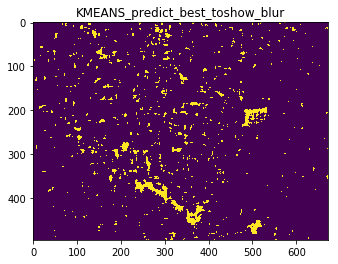

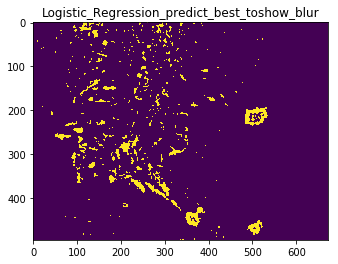

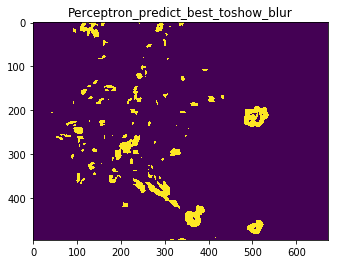

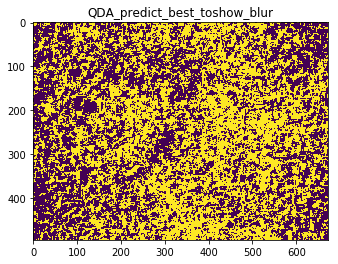

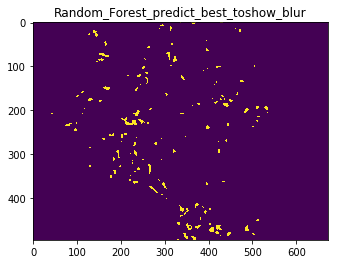

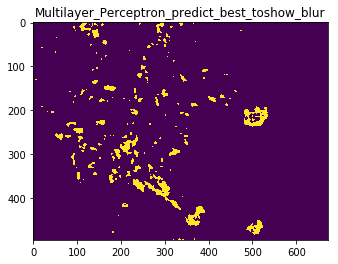

In [47]:
plt.figure()
plt.title('KMEANS_predict_best_toshow_blur')
plt.imshow(KMEANS_predict_best_toshow_blur)

plt.figure()
plt.title('Logistic_Regression_predict_best_toshow_blur')
plt.imshow(Logistic_Regression_predict_best_toshow_blur)

plt.figure()
plt.title('Perceptron_predict_best_toshow_blur')
plt.imshow(Perceptron_predict_best_toshow_blur)

plt.figure()
plt.title('QDA_predict_best_toshow_blur')
plt.imshow(QDA_predict_best_toshow_blur)

plt.figure()
plt.title('Random_Forest_predict_best_toshow_blur')
plt.imshow(Random_Forest_predict_best_toshow_blur)

plt.figure()
plt.title('Multilayer_Perceptron_predict_best_toshow_blur')
plt.imshow(Multilayer_Perceptron_predict_best_toshow_blur)

### Cell 1.3: Blurring: evaluation

F-Mesure, Prediction and Recall for all ML algorithm after the blurring step.

In [48]:
# Evaluation 
# app stands for after Post-Processing


KMEANS_predict_best_toshow_blureval = KMEANS_predict_best_toshow_blur.reshape(333312)
KMEANS_f1_scores_app = f1_score(FV_Y_test, KMEANS_predict_best_toshow_blureval, labels=[255], average=None)
KMEANS_Recall_scores_app = recall_score(FV_Y_test, KMEANS_predict_best_toshow_blureval, labels=[255], average=None)
KMEANS_Precision_scores_app = precision_score(FV_Y_test, KMEANS_predict_best_toshow_blureval, labels=[255], average=None)
print('\n')
print('The F1 score for the best KMEANS after Blurring = ', KMEANS_f1_scores_app)
print('Recall obtained for the best KMEANS after Blurring  = ', KMEANS_Recall_scores_app)
print('Precision obtained for the best KMEANS after Blurring   = ', KMEANS_Precision_scores_app)
print('\n')



Logistic_Regression_predict_best_toshow_blureval = Logistic_Regression_predict_best_toshow_blur.reshape(333312)
Logistic_Regression_f1_scores_app = f1_score(FV_Y_test, Logistic_Regression_predict_best_toshow_blureval, labels=[255], average=None)
Logistic_Regression_Recall_scores_app = recall_score(FV_Y_test, Logistic_Regression_predict_best_toshow_blureval, labels=[255], average=None)
Logistic_Regression_Precision_scores_app = precision_score(FV_Y_test, Logistic_Regression_predict_best_toshow_blureval, labels=[255], average=None)
print('The F1 score for the best Logistic Regression after Blurring  = ', Logistic_Regression_f1_scores_app)
print('Recall obtained for the best Logistic Regression after Blurring  = ', Logistic_Regression_Recall_scores_app)
print('Precision obtained for the best Logistic Regression after Blurring   = ', Logistic_Regression_Precision_scores_app)
print('\n')



Perceptron_predict_best_toshow_blureval = Perceptron_predict_best_toshow_blur.reshape(333312)
Perceptron_f1_scores_app = f1_score(FV_Y_test, Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
Perceptron_Recall_scores_app = recall_score(FV_Y_test, Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
Perceptron_Precision_scores_app = precision_score(FV_Y_test, Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
print('The F1 score for the best Perceptron after Blurring  = ', Perceptron_f1_scores_app)
print('Recall obtained for the best Perceptron after Blurring  = ', Perceptron_Recall_scores_app)
print('Precision obtained for the best Perceptron after Blurring   = ', Perceptron_Precision_scores_app)
print('\n')



QDA_predict_best_toshow_blureval = QDA_predict_best_toshow_blur.reshape(333312)
QDA_f1_scores_app = f1_score(FV_Y_test, QDA_predict_best_toshow_blureval, labels=[255], average=None)
QDA_Recall_scores_app = recall_score(FV_Y_test, QDA_predict_best_toshow_blureval, labels=[255], average=None)
QDA_Precision_scores_app = precision_score(FV_Y_test, QDA_predict_best_toshow_blureval, labels=[255], average=None)
print('The F1 score for the best QDA after Blurring = ', QDA_f1_scores_app)
print('Recall obtained for the best QDA after Blurring  = ', QDA_Recall_scores_app)
print('Precision obtained for the best QDA after Blurring  = ', QDA_Precision_scores_app)
print('\n')



Random_Forest_predict_best_toshow_blureval = Random_Forest_predict_best_toshow_blur.reshape(333312)
Random_Forest_f1_scores_app = f1_score(FV_Y_test, Random_Forest_predict_best_toshow_blureval, labels=[255], average=None)
Random_Forest_Recall_scores_app = recall_score(FV_Y_test, Random_Forest_predict_best_toshow_blureval, labels=[255], average=None)
Random_Forest_Precision_scores_app = precision_score(FV_Y_test, Random_Forest_predict_best_toshow_blureval, labels=[255], average=None)
print('The F1 score for the best Random Forest after Blurring  = ', Random_Forest_f1_scores_app)
print('Recall obtained for the best Random Forest after Blurring  = ', Random_Forest_Recall_scores_app)
print('Precision obtained for the best Random Forest after Blurring  = ', Random_Forest_Precision_scores_app)
print('\n')



Multilayer_Perceptron_predict_best_toshow_blureval = Multilayer_Perceptron_predict_best_toshow_blur.reshape(333312)
Multilayer_Perceptron_f1_scores_app = f1_score(FV_Y_test, Multilayer_Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
Multilayer_Perceptron_Recall_scores_app = recall_score(FV_Y_test, Multilayer_Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
Multilayer_Perceptron_Precision_scores_app = precision_score(FV_Y_test, Multilayer_Perceptron_predict_best_toshow_blureval, labels=[255], average=None)
print('The F1 score for the best Multilayer Perceptron after Blurring = ', Multilayer_Perceptron_f1_scores_app)
print('Recall obtained for the best Multilayer Perceptron after Blurring = ', Multilayer_Perceptron_Recall_scores_app)
print('Precision obtained for the best Multilayer Perceptron after Blurring  = ', Multilayer_Perceptron_Precision_scores_app)




The F1 score for the best KMEANS after Blurring =  [0.22163921]
Recall obtained for the best KMEANS after Blurring  =  [0.23351994]
Precision obtained for the best KMEANS after Blurring   =  [0.21090886]


The F1 score for the best Logistic Regression after Blurring  =  [0.40829503]
Recall obtained for the best Logistic Regression after Blurring  =  [0.40713786]
Precision obtained for the best Logistic Regression after Blurring   =  [0.40945879]


The F1 score for the best Perceptron after Blurring  =  [0.28351288]
Recall obtained for the best Perceptron after Blurring  =  [0.28453464]
Precision obtained for the best Perceptron after Blurring   =  [0.28249844]


The F1 score for the best QDA after Blurring =  [0.09244378]
Recall obtained for the best QDA after Blurring  =  [0.59090273]
Precision obtained for the best QDA after Blurring  =  [0.0501443]


The F1 score for the best Random Forest after Blurring  =  [0.1723254]
Recall obtained for the best Random Forest after Blurring  = 

### Cell 2: Connected Components (evaluation useless)

Connected compononents functions allowed to labelized each predicted degradation zone. It will be usefull for the future quantification of dynamics of degradation once we succed to perfom a sufficiently effective segmentation. 
Furthermore, visually, all the degradation will have a different color.

No evaluation is required because there is no change regarding the pixel classification. 

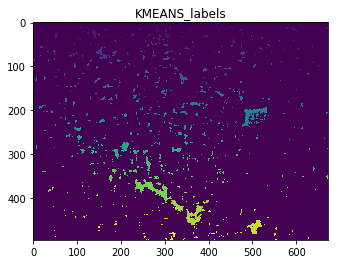

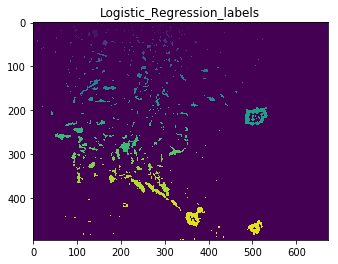

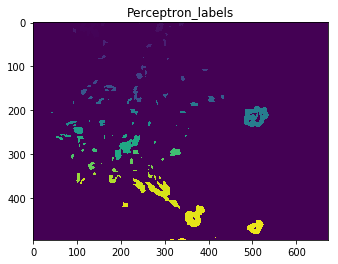

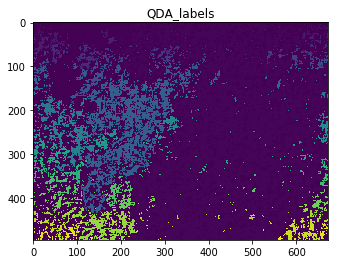

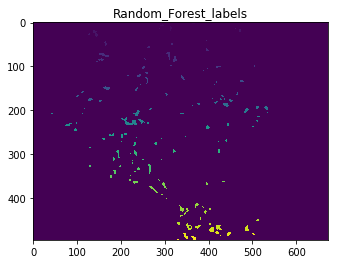

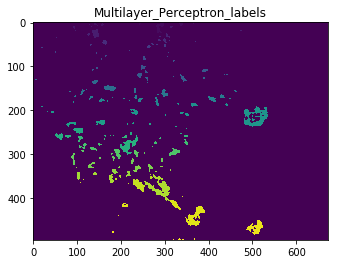

In [49]:
#Perform Connected Components
# https://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html

KMEANS_nlabels, KMEANS_labels, KMEANS_stats, KMEANS_centroids = cv2.connectedComponentsWithStats(KMEANS_predict_best_toshow_blur)
plt.figure()
plt.title('KMEANS_labels')
plt.imshow(KMEANS_labels)

Logistic_Regression_nlabels, Logistic_Regression_labels, Logistic_Regression_stats, Logistic_Regression_centroids = cv2.connectedComponentsWithStats(Logistic_Regression_predict_best_toshow_blur)
plt.figure()
plt.title('Logistic_Regression_labels')
plt.imshow(Logistic_Regression_labels)

Perceptron_nlabels, Perceptron_labels, Perceptron_stats, Perceptron_centroids = cv2.connectedComponentsWithStats(Perceptron_predict_best_toshow_blur)
plt.figure()
plt.title('Perceptron_labels')
plt.imshow(Perceptron_labels)

QDA_nlabels, QDA_labels, QDA_stats, QDA_centroids = cv2.connectedComponentsWithStats(QDA_predict_best_toshow_blur)
plt.figure()
plt.title('QDA_labels')
plt.imshow(QDA_labels)

Random_Forest_nlabels, Random_Forest_labels, Random_Forest_stats, Random_Forest_centroids = cv2.connectedComponentsWithStats(Random_Forest_predict_best_toshow_blur)
plt.figure()
plt.title('Random_Forest_labels')
plt.imshow(Random_Forest_labels)

Multilayer_Perceptron_nlabels, Multilayer_Perceptron_labels, Multilayer_Perceptron_stats, Multilayer_Perceptron_centroids = cv2.connectedComponentsWithStats(Multilayer_Perceptron_predict_best_toshow_blur)
plt.figure()
plt.title('Multilayer_Perceptron_labels')
plt.imshow(Multilayer_Perceptron_labels)


### Cell 3.1: Delete too small Connected Components

Deletion of predicted degradation zone which are too small for having a physical meaning. Deleted zones have different area according to each algorithm. The step will be evaluated using the F-mesure in cell 3.3.

***To improve :*** Find the best size of deleted zones especially for Multilayer Perceptron and Random Forest.  

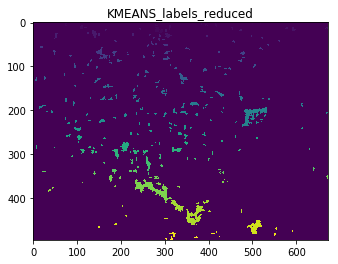

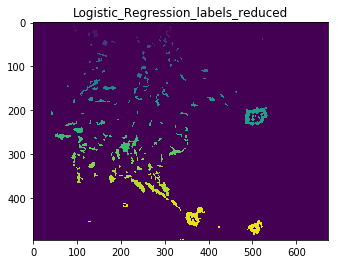

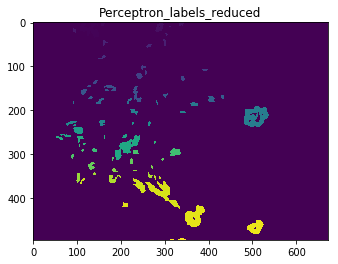

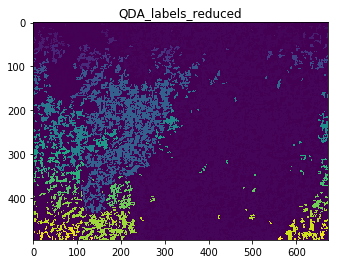

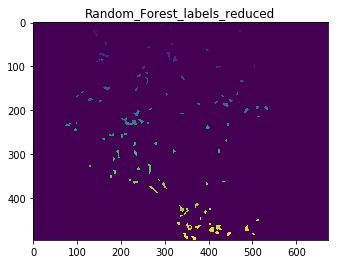

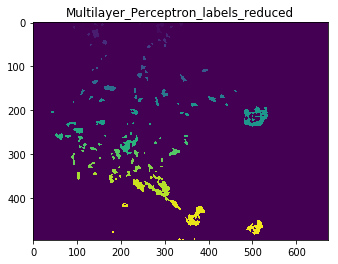

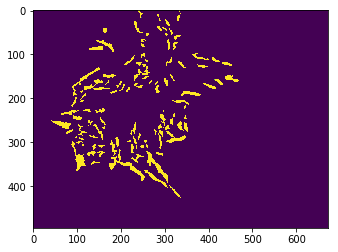

In [50]:
# Delete Connected Components with X pixels or less
# A loop was already done for each 4*n pixels fith n integer and I set the best filter of minimum size  (à reformuler !) 

X=12

KMEANS_labels_reduced = KMEANS_labels
KMEANS_stats_reduced = KMEANS_stats
Logistic_Regression_labels_reduced = Logistic_Regression_labels
Logistic_Regression_stats_reduced = Logistic_Regression_stats
Perceptron_labels_reduced = Perceptron_labels
Perceptron_stats_reduced = Perceptron_stats
QDA_labels_reduced = QDA_labels
QDA_stats_reduced = QDA_stats
Random_Forest_labels_reduced = Random_Forest_labels
Random_Forest_stats_reduced = Random_Forest_stats
Multilayer_Perceptron_labels_reduced = Multilayer_Perceptron_labels
Multilayer_Perceptron_stats_reduced = Multilayer_Perceptron_stats
cpt = 0

for i in range (0,len(KMEANS_stats)) :
    if KMEANS_stats[i,4] <= X :
#         KMEANS_stats_reduced = np.delete(KMEANS_stats_reduced, (i))
        x1 = KMEANS_stats[i,0] 
        x2 = KMEANS_stats[i,2]
        y1 = KMEANS_stats[i,1]
        y2 = KMEANS_stats[i,3]
        KMEANS_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
# KMEANS_stats_reduced = KMEANS_stats_reduced.reshape(len(KMEANS_stats[:,0])-cpt*5,5) #attention bugs !!
plt.figure()
plt.title('KMEANS_labels_reduced')
plt.imshow(KMEANS_labels_reduced)

for i in range (0,len(Logistic_Regression_stats)) :
    if Logistic_Regression_stats[i,4] <= X :
#         LR2_1_stats_reduced = np.delete(LR2_1_stats_reduced, (i))
        x1 = Logistic_Regression_stats[i,0] 
        x2 = Logistic_Regression_stats[i,2]
        y1 = Logistic_Regression_stats[i,1]
        y2 = Logistic_Regression_stats[i,3]
        Logistic_Regression_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
# LR2_1_stats_reduced = LR2_1_stats_reduced.reshape(len(LR2_1_stats[:,0])-cpt*5,5) #attention bugs !!
plt.figure()
plt.title('Logistic_Regression_labels_reduced')
plt.imshow(Logistic_Regression_labels_reduced)
# plt.imshow(LR2_1_labels,cmap = 'autumn') possibility to change color map but no obtimal color map already existant


for i in range (0,len(Perceptron_stats)) :
    if Perceptron_stats[i,4] <= X :
        x1 = Perceptron_stats[i,0] 
        x2 = Perceptron_stats[i,2]
        y1 = Perceptron_stats[i,1]
        y2 = Perceptron_stats[i,3]
        Perceptron_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
plt.figure()
plt.title('Perceptron_labels_reduced')
plt.imshow(Perceptron_labels_reduced)

for i in range (0,len(QDA_stats)) :
    if QDA_stats[i,4] <= X :
        x1 = QDA_stats[i,0] 
        x2 = QDA_stats[i,2]
        y1 = QDA_stats[i,1]
        y2 = QDA_stats[i,3]
        QDA_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
plt.figure()
plt.title('QDA_labels_reduced')
plt.imshow(QDA_labels_reduced)

for i in range (0,len(Random_Forest_stats)) :
    if Random_Forest_stats[i,4] <= X :
        x1 = Random_Forest_stats[i,0] 
        x2 = Random_Forest_stats[i,2]
        y1 = Random_Forest_stats[i,1]
        y2 = Random_Forest_stats[i,3]
        Random_Forest_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
plt.figure()
plt.title('Random_Forest_labels_reduced')
plt.imshow(Random_Forest_labels_reduced)


for i in range (0,len(Multilayer_Perceptron_stats)) :
    if Multilayer_Perceptron_stats[i,4] <= X :
        x1 = Multilayer_Perceptron_stats[i,0] 
        x2 = Multilayer_Perceptron_stats[i,2]
        y1 = Multilayer_Perceptron_stats[i,1]
        y2 = Multilayer_Perceptron_stats[i,3]
        Multilayer_Perceptron_labels_reduced[y1:y1+y2,x1:x1+x2] = 0
        cpt = cpt + 1        
plt.figure()
plt.title('Multilayer_Perceptron_labels_reduced')
plt.imshow(Multilayer_Perceptron_labels_reduced)

plt.figure()
plt.imshow(FV_Y_test.reshape(496,672))

### Cell 3.2: Binarization before evaluation

Because of the change of colors of pixels predicted as degradation zones due to Connected Components, we need to transform the image into binary image for evaluation. All the pixels predicted as degradation zones will be in yellow (or in white depending on the functions used to show images) and the others in purple (or in black). 


In [51]:
#Binarization

KMEANS_labels_reduced_binarized = copy.deepcopy(KMEANS_labels_reduced)
Logistic_Regression_labels_reduced_binarized = copy.deepcopy(Logistic_Regression_labels_reduced)
Perceptron_labels_reduced_binarized = copy.deepcopy(Perceptron_labels_reduced)
QDA_labels_reduced_binarized = copy.deepcopy(QDA_labels_reduced)
Random_Forest_labels_reduced_binarized  = copy.deepcopy(Random_Forest_labels_reduced)
Multilayer_Perceptron_labels_reduced_binarized = copy.deepcopy(Multilayer_Perceptron_labels_reduced)

for i in range (0,len(KMEANS_labels_reduced[:,1])):
    for j in range (0,len(KMEANS_labels_reduced[1,:])):
        if KMEANS_labels_reduced_binarized[i,j] != 0:                    
            KMEANS_labels_reduced_binarized[i,j] = 255
        if Logistic_Regression_labels_reduced_binarized[i,j] != 0:                    
            Logistic_Regression_labels_reduced_binarized[i,j] = 255
        if Perceptron_labels_reduced_binarized[i,j] != 0:                    
            Perceptron_labels_reduced_binarized[i,j] = 255
        if QDA_labels_reduced_binarized[i,j] != 0:                    
            QDA_labels_reduced_binarized[i,j] = 255
        if Random_Forest_labels_reduced_binarized[i,j] != 0:                    
            Random_Forest_labels_reduced_binarized[i,j] = 255
        if Multilayer_Perceptron_labels_reduced_binarized[i,j] != 0:                    
            Multilayer_Perceptron_labels_reduced_binarized[i,j] = 255
            

KMEANS_labels_reduced_binarized = KMEANS_labels_reduced_binarized.reshape(333312)
Logistic_Regression_labels_reduced_binarized = Logistic_Regression_labels_reduced_binarized.reshape(333312)
Perceptron_labels_reduced_binarized = Perceptron_labels_reduced_binarized.reshape(333312)
QDA_labels_reduced_binarized = QDA_labels_reduced_binarized.reshape(333312)
Random_Forest_labels_reduced_binarized  = Random_Forest_labels_reduced_binarized.reshape(333312)
Multilayer_Perceptron_labels_reduced_binarized = Multilayer_Perceptron_labels_reduced_binarized.reshape(333312)

### Cell 3.3: Evaluation of deletion

F-Mesure, Prediction and Recall for all ML algorithm after the deletion of too small connected components step.

In [52]:
# Evaluation of KMEANS for different number of clusters
# app stands for after Post-Processing

KMEANS_f1_scores_app = f1_score(FV_Y_test, KMEANS_labels_reduced_binarized, labels=[255], average=None)
KMEANS_Recall_scores_app = recall_score(FV_Y_test, KMEANS_labels_reduced_binarized, labels=[255], average=None)
KMEANS_Precision_scores_app = precision_score(FV_Y_test, KMEANS_labels_reduced_binarized, labels=[255], average=None)
print('\n')
print('The F1 score for the best KMEANS after deletion of small components = ', KMEANS_f1_scores_app)
print('Recall obtained for the best KMEANS after deletion of small components = ', KMEANS_Recall_scores_app)
print('Precision obtained for the best KMEANS after deletion of small components  = ', KMEANS_Precision_scores_app)
print('\n')



Logistic_Regression_f1_scores_app = f1_score(FV_Y_test ,Logistic_Regression_labels_reduced_binarized, labels=[255], average=None)
Logistic_Regression_Recall_scores_app = recall_score(FV_Y_test, Logistic_Regression_labels_reduced_binarized, labels=[255], average=None)
Logistic_Regression_Precision_scores_app = precision_score(FV_Y_test, Logistic_Regression_labels_reduced_binarized, labels=[255], average=None)
print('The F1 score for the best Logistic Regression after deletion of small components = ', Logistic_Regression_f1_scores_app)
print('Recall obtained for the best Logistic Regression after deletion of small components = ', Logistic_Regression_Recall_scores_app)
print('Precision obtained for the best Logistic Regression after deletion of small components  = ', Logistic_Regression_Precision_scores_app)
print('\n')



Perceptron_f1_scores_app = f1_score(FV_Y_test, Perceptron_labels_reduced_binarized, labels=[255], average=None)
Perceptron_Recall_scores_app = recall_score(FV_Y_test, Perceptron_labels_reduced_binarized, labels=[255], average=None)
Perceptron_Precision_scores_app = precision_score(FV_Y_test, Perceptron_labels_reduced_binarized, labels=[255], average=None)
print('The F1 score for the best Perceptron after deletion of small connected components = ', Perceptron_f1_scores_app)
print('Recall obtained for the best Perceptron after deletion of small connected components = ', Perceptron_Recall_scores_app)
print('Precision obtained for the best Perceptron after deletion of small connected components  = ', Perceptron_Precision_scores_app)
print('\n')



QDA_f1_scores_app = f1_score(FV_Y_test, QDA_labels_reduced_binarized, labels=[255], average=None)
QDA_Recall_scores_app = recall_score(FV_Y_test, QDA_labels_reduced_binarized, labels=[255], average=None)
QDA_Precision_scores_app = precision_score(FV_Y_test, QDA_labels_reduced_binarized, labels=[255], average=None)
print('The F1 score for the best QDA after deletion of small connected components = ', QDA_f1_scores_app)
print('Recall obtained for the best QDA after deletion of small connected components = ', QDA_Recall_scores_app)
print('Precision obtained for the best QDA after deletion of small connected components  = ', QDA_Precision_scores_app)
print('\n')



Random_Forest_f1_scores_app = f1_score(FV_Y_test, Random_Forest_labels_reduced_binarized, labels=[255], average=None)
Random_Forest_Recall_scores_app = recall_score(FV_Y_test, Random_Forest_labels_reduced_binarized, labels=[255], average=None)
Random_Forest_Precision_scores_app = precision_score(FV_Y_test, Random_Forest_labels_reduced_binarized, labels=[255], average=None)
print('The F1 score for the best Random Forest after deletion of small connected components = ', Random_Forest_f1_scores_app)
print('Recall obtained for the best Random Forest after deletion of small connected components = ', Random_Forest_Recall_scores_app)
print('Precision obtained for the best Random Forest after deletion of small connected components  = ', Random_Forest_Precision_scores_app)
print('\n')



Multilayer_Perceptron_f1_scores_app = f1_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_binarized, labels=[255], average=None)
Multilayer_Perceptron_Recall_scores_app = recall_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_binarized, labels=[255], average=None)
Multilayer_Perceptron_Precision_scores_app = precision_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_binarized, labels=[255], average=None)
print('The F1 score for the best Multilayer Perceptron after deletion of small connected components = ', Multilayer_Perceptron_f1_scores_app)
print('Recall obtained for the best Multilayer Perceptron after deletion of small connected components = ', Multilayer_Perceptron_Recall_scores_app)
print('Precision obtained for the best Multilayer Perceptron after deletion of small connected components  = ', Multilayer_Perceptron_Precision_scores_app)
print('\n')



The F1 score for the best KMEANS after deletion of small components =  [0.22795175]
Recall obtained for the best KMEANS after deletion of small components =  [0.21623513]
Precision obtained for the best KMEANS after deletion of small components  =  [0.24101084]


The F1 score for the best Logistic Regression after deletion of small components =  [0.41559209]
Recall obtained for the best Logistic Regression after deletion of small components =  [0.39356193]
Precision obtained for the best Logistic Regression after deletion of small components  =  [0.44023483]


The F1 score for the best Perceptron after deletion of small connected components =  [0.28014719]
Recall obtained for the best Perceptron after deletion of small connected components =  [0.27970609]
Precision obtained for the best Perceptron after deletion of small connected components  =  [0.28058968]


The F1 score for the best QDA after deletion of small connected components =  [0.09389403]
Recall obtained for the best QDA a

### Cell 4.1: Deletion of matrix defects outside the cell contact -> Function creation

The function created here is able to identify areas wich were never been crossed by the endothelial cells during the different movies of the testing set (must be the developping set once created).  
The final idea is to transform predicted degradation pixels that are located apart from the surface of the endothelial cell into non-degradation pixels. As degradation is due to a cell/surface-of-gelatin contact, it's impossible to have degradation in an area wich was never been crossed by the endothelial cell.  
If something is predicted as degradation pixels apart from the surface of the endothelial cell, it must be matrix defects.

**Watch out !** The Multilayer Perceptron and the Random Forest should not need this post-processing because they should identify by themself matrix defects as non degradation zones.  

In [53]:
def not_touched_areas_beginning(path_image):
    
    '''Delete the area keeped after performing ML which can't be degadation because
    It's not under the cell (first loop) neither around the cell (second loop) '''
    
    
    
#     F = Image.open("monimage.png")  
# # anciennement np.asarray
#  # Transformation de l'image en tableau numpy
    F = imread(path_image)
    if len(F.shape) == 3:
        F = F[:,:,0]
    F = cv2.medianBlur(F, 5)
#   F= cv2.equalizeHist(F)
    A = np.zeros((F.shape))

    # creation of a matrix with value one for the pixel located in the cell and
    # 0 outside

    for i in range(0,F.shape[0]):
         for j in range (0,F.shape[1]):
            if F[i,j]>=20:   
                A[i,j] = 1
            else:
                A[i,j] = 0

    # Put ones in a larger area around the cell (pixel value chosen in a quite random
    # way....)

    for i in range (5,F.shape[0]-5):
        for j in range (5,F.shape[1]-5):
            if  A[i,j] == 1: 
                for k in range(0,50):
                    for l in range (0,50):
                              A[i-k,j-l] = 1 
            else:
                A[i,j] = 0
                
    reshapeA = A[12:A.shape[0]-12,12:A.shape[1]-12]
    return reshapeA,F

    
def not_touched_areas_current(path_image):

    ''' Same description as before. It's use for the followings images used after the one multiply by not touched areas beginning"
    --> Change the explanation !  '''

    F = imread(path_image)
    if len(F.shape) == 3:
        F = F[:,:,0]
    F = cv2.medianBlur(F, 5)
#   F = cv2.equalizeHist(F)
    A = np.zeros((F.shape))

    # creation of a matrix with value one for the pixel located in the cell and
    # 0 outside

    for i in range(0,F.shape[0]):
         for j in range (0,F.shape[1]):
            if F[i,j]>=20: # 
                A[i,j] = 1
            else:
                A[i,j] = 0
    reshapeA = A[12:A.shape[0]-12,12:A.shape[1]-12]
    return reshapeA, F

### Cell 4.2: Deletion of matrix defects outside the cell contact -> creation of mask and deletion

Use of the previous function and transformation of predicted degradation pixels that are located apart from the surface of the endothelial cell into non-degradation pixels.

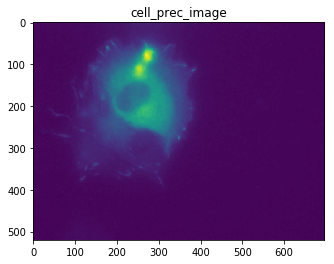

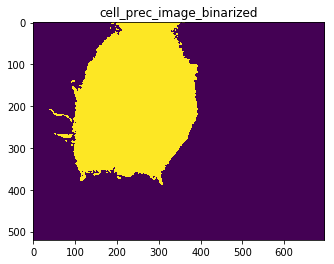

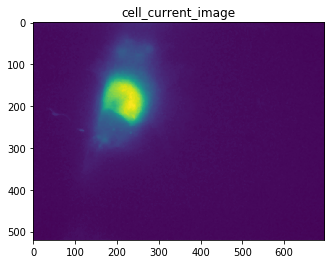

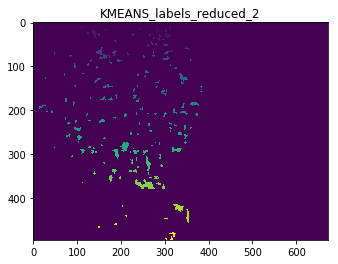

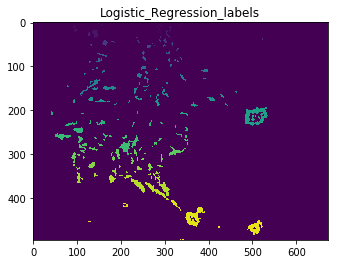

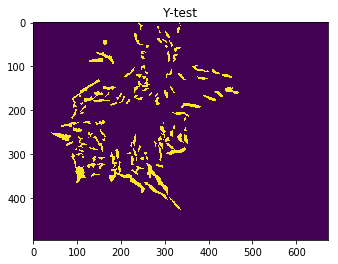

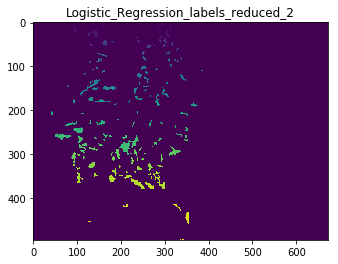

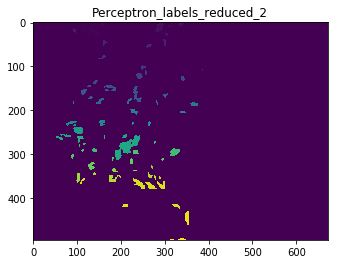

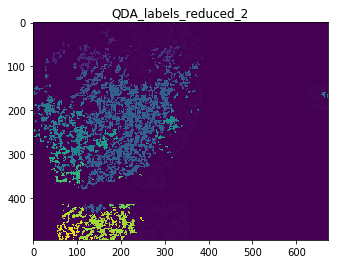

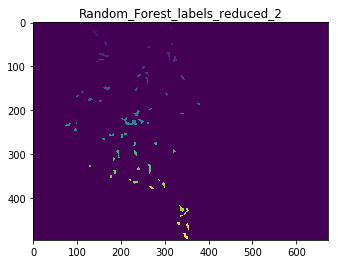

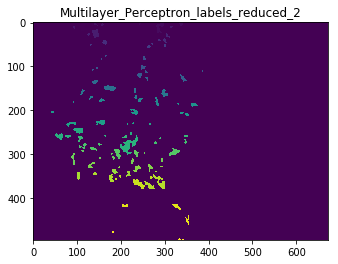

In [54]:
#Use of homemade function for deleting meaningless areas (see below the description)


mask_prec_cellGFP, cell_prec_image = not_touched_areas_beginning(path_test_input_1_prec_cellGFP)
mask_current_cellGFP, cell_current_image = not_touched_areas_current(path_test_input_1_cellGFP)
mask_cellGFP = mask_prec_cellGFP + mask_current_cellGFP
for i in range(0,mask_cellGFP.shape[0]):
    for j in range(0,mask_cellGFP.shape[1]):
        if mask_cellGFP[i,j] != 0:
            mask_cellGFP[i,j] = 1
        
ret,cell_prec_image_binarized = cv2.threshold(cell_prec_image,20,255,cv2.THRESH_BINARY)
                

KMEANS_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
Logistic_Regression_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
Perceptron_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
QDA_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
Random_Forest_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
Multilayer_Perceptron_labels_reduced_2 = np.zeros(KMEANS_labels_reduced.shape) # or np.zeros((496,672)) it's the same
for i in range(0,KMEANS_labels_reduced.shape[0]):
    for j in range(0,KMEANS_labels_reduced.shape[1]):
        nb = mask_cellGFP[i,j]
        KMEANS_labels_reduced_2[i,j] = KMEANS_labels_reduced[i,j] * nb
        Logistic_Regression_labels_reduced_2[i,j] = Logistic_Regression_labels_reduced[i,j] * nb
        Perceptron_labels_reduced_2[i,j] = Perceptron_labels_reduced[i,j] * nb
        QDA_labels_reduced_2[i,j] = QDA_labels_reduced[i,j] * nb
        Random_Forest_labels_reduced_2[i,j] = Random_Forest_labels_reduced[i,j] * nb
        Multilayer_Perceptron_labels_reduced_2[i,j] = Multilayer_Perceptron_labels_reduced[i,j] * nb   
        
plt.figure()
plt.title('cell_prec_image')
plt.imshow(cell_prec_image)
plt.figure()
plt.title('cell_prec_image_binarized')
plt.imshow(cell_prec_image_binarized)
plt.figure()
plt.title('cell_current_image')
plt.imshow(cell_current_image)
plt.figure()
plt.title('KMEANS_labels_reduced_2')
plt.imshow(KMEANS_labels_reduced_2)
plt.figure()
plt.title('Logistic_Regression_labels')
plt.imshow(Logistic_Regression_labels)
plt.figure()
plt.title('Y-test')
plt.imshow(FV_Y_test.reshape(496,672))
plt.figure()
plt.title('Logistic_Regression_labels_reduced_2')
plt.imshow(Logistic_Regression_labels_reduced_2)
plt.figure()
plt.title('Perceptron_labels_reduced_2')
plt.imshow(Perceptron_labels_reduced_2)
plt.figure()
plt.title('QDA_labels_reduced_2')
plt.imshow(QDA_labels_reduced_2)
plt.figure()
plt.title('Random_Forest_labels_reduced_2')
plt.imshow(Random_Forest_labels_reduced_2)
plt.figure()
plt.title('Multilayer_Perceptron_labels_reduced_2')
plt.imshow(Multilayer_Perceptron_labels_reduced_2)


# Z2=not_touched_areas_current('image cell 2 (22).jpg');
# EBW_RED2=zeros(M,N); 
# Ztot = Z1;
# for i=1:M:
#     for j=1:N:
#        if Z2(i,j)==1 && Ztot(i,j)==0
#            Ztot(i,j)=1        
 


### Cell 4.3: Binarization before evaluation of deletion of some matrix defects 

Because of the change of colors of pixels predicted as degradation zones due to Connected Components, we need to transform the image into binary image for evaluation. All the pixels predicted as degradation zones will be in yellow (or in white depending on the functions used to show images) and the others in purple (or in black).

In [55]:
#Binarization

# The use of deepcopy is explained in the cells used for K-Means
KMEANS_labels_reduced_2_binarized = copy.deepcopy(KMEANS_labels_reduced_2)
Logistic_Regression_labels_reduced_2_binarized = copy.deepcopy(Logistic_Regression_labels_reduced_2)
Perceptron_labels_reduced_2_binarized = copy.deepcopy(Perceptron_labels_reduced_2)
QDA_labels_reduced_2_binarized = copy.deepcopy(QDA_labels_reduced_2)
Random_Forest_labels_reduced_2_binarized  = copy.deepcopy(Random_Forest_labels_reduced_2)
Multilayer_Perceptron_labels_reduced_2_binarized = copy.deepcopy(Multilayer_Perceptron_labels_reduced_2)

for i in range (0,len(KMEANS_labels_reduced_2[:,1])):
    for j in range (0,len(KMEANS_labels_reduced_2[1,:])):
        if KMEANS_labels_reduced_2_binarized[i,j] != 0:                    
            KMEANS_labels_reduced_2_binarized[i,j] = 255
        if Logistic_Regression_labels_reduced_2_binarized[i,j] != 0:                    
            Logistic_Regression_labels_reduced_2_binarized[i,j] = 255
        if Perceptron_labels_reduced_2_binarized[i,j] != 0:                    
            Perceptron_labels_reduced_2_binarized[i,j] = 255
        if QDA_labels_reduced_2_binarized[i,j] != 0:                    
            QDA_labels_reduced_2_binarized[i,j] = 255
        if Random_Forest_labels_reduced_2_binarized[i,j] != 0:                    
            Random_Forest_labels_reduced_2_binarized[i,j] = 255
        if Multilayer_Perceptron_labels_reduced_2_binarized[i,j] != 0:                    
            Multilayer_Perceptron_labels_reduced_2_binarized[i,j] = 255
            

KMEANS_labels_reduced_2_binarized = KMEANS_labels_reduced_2_binarized.reshape(333312)
Logistic_Regression_labels_reduced_2_binarized = Logistic_Regression_labels_reduced_2_binarized.reshape(333312)
Perceptron_labels_reduced_2_binarized = Perceptron_labels_reduced_2_binarized.reshape(333312)
QDA_labels_reduced_2_binarized = QDA_labels_reduced_2_binarized.reshape(333312)
Random_Forest_labels_reduced_2_binarized  = Random_Forest_labels_reduced_2_binarized.reshape(333312)
Multilayer_Perceptron_labels_reduced_2_binarized = Multilayer_Perceptron_labels_reduced_2_binarized.reshape(333312)

### Cell 4.4: Final evaluation of ML algorithms

F-Mesure, Prediction and Recall for all ML algorithm after the deletion of matrix defect (last step of Post Processing). 

In [56]:
# Evaluation of KMEANS for different number of clusters
# app stands for after Post-Processing

KMEANS_f1_scores_app = f1_score(FV_Y_test, KMEANS_labels_reduced_2_binarized, labels=[255], average=None)
KMEANS_Recall_scores_app = recall_score(FV_Y_test, KMEANS_labels_reduced_2_binarized, labels=[255], average=None)
KMEANS_Precision_scores_app = precision_score(FV_Y_test, KMEANS_labels_reduced_2_binarized, labels=[255], average=None)
print('\n')
print('The F1 score for the best KMEANS after Post-Processing = ', KMEANS_f1_scores_app)
print('Recall obtained for the best KMEANS after Post-Processing = ', KMEANS_Recall_scores_app)
print('Precision obtained for the best KMEANS after Post-Processing  = ', KMEANS_Precision_scores_app)
print('\n')



Logistic_Regression_f1_scores_app = f1_score(FV_Y_test ,Logistic_Regression_labels_reduced_2_binarized, labels=[255], average=None)
Logistic_Regression_Recall_scores_app = recall_score(FV_Y_test, Logistic_Regression_labels_reduced_2_binarized, labels=[255], average=None)
Logistic_Regression_Precision_scores_app = precision_score(FV_Y_test, Logistic_Regression_labels_reduced_2_binarized, labels=[255], average=None)
print('The F1 score for the best Logistic Regression after Post-Processing = ', Logistic_Regression_f1_scores_app)
print('Recall obtained for the best Logistic Regression after Post-Processing = ', Logistic_Regression_Recall_scores_app)
print('Precision obtained for the best Logistic Regression after Post-Processing  = ', Logistic_Regression_Precision_scores_app)
print('\n')



Perceptron_f1_scores_app = f1_score(FV_Y_test, Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
Perceptron_Recall_scores_app = recall_score(FV_Y_test, Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
Perceptron_Precision_scores_app = precision_score(FV_Y_test, Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
print('The F1 score for the best Perceptron after Post-Processing = ', Perceptron_f1_scores_app)
print('Recall obtained for the best Perceptron after Post-Processing = ', Perceptron_Recall_scores_app)
print('Precision obtained for the best Perceptron after Post-Processing  = ', Perceptron_Precision_scores_app)
print('\n')



QDA_f1_scores_app = f1_score(FV_Y_test, QDA_labels_reduced_2_binarized, labels=[255], average=None)
QDA_Recall_scores_app = recall_score(FV_Y_test, QDA_labels_reduced_2_binarized, labels=[255], average=None)
QDA_Precision_scores_app = precision_score(FV_Y_test, QDA_labels_reduced_2_binarized, labels=[255], average=None)
print('The F1 score for the best QDA after Post-Processing = ', QDA_f1_scores_app)
print('Recall obtained for the best QDA after Post-Processing = ', QDA_Recall_scores_app)
print('Precision obtained for the best QDA after Post-Processing  = ', QDA_Precision_scores_app)
print('\n')



Random_Forest_f1_scores_app = f1_score(FV_Y_test, Random_Forest_labels_reduced_2_binarized, labels=[255], average=None)
Random_Forest_Recall_scores_app = recall_score(FV_Y_test, Random_Forest_labels_reduced_2_binarized, labels=[255], average=None)
Random_Forest_Precision_scores_app = precision_score(FV_Y_test, Random_Forest_labels_reduced_2_binarized, labels=[255], average=None)
print('The F1 score for the best Random Forest after Post-Processing = ', Random_Forest_f1_scores_app)
print('Recall obtained for the best Random Forest after Post-Processing = ', Random_Forest_Recall_scores_app)
print('Precision obtained for the best Random Forest after Post-Processing  = ', Random_Forest_Precision_scores_app)
print('\n')



Multilayer_Perceptron_f1_scores_app = f1_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
Multilayer_Perceptron_Recall_scores_app = recall_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
Multilayer_Perceptron_Precision_scores_app = precision_score(FV_Y_test, Multilayer_Perceptron_labels_reduced_2_binarized, labels=[255], average=None)
print('The F1 score for the best Multilayer Perceptron after Post-Processing = ', Multilayer_Perceptron_f1_scores_app)
print('Recall obtained for the best Multilayer Perceptron after Post-Processing = ', Multilayer_Perceptron_Recall_scores_app)
print('Precision obtained for the best Multilayer Perceptron after Post-Processing  = ', Multilayer_Perceptron_Precision_scores_app)





The F1 score for the best KMEANS after Post-Processing =  [0.23601575]
Recall obtained for the best KMEANS after Post-Processing =  [0.18040588]
Precision obtained for the best KMEANS after Post-Processing  =  [0.34118581]


The F1 score for the best Logistic Regression after Post-Processing =  [0.42824232]
Recall obtained for the best Logistic Regression after Post-Processing =  [0.35122463]
Precision obtained for the best Logistic Regression after Post-Processing  =  [0.54852459]


The F1 score for the best Perceptron after Post-Processing =  [0.29755341]
Recall obtained for the best Perceptron after Post-Processing =  [0.24170749]
Precision obtained for the best Perceptron after Post-Processing  =  [0.38695944]


The F1 score for the best QDA after Post-Processing =  [0.17425445]
Recall obtained for the best QDA after Post-Processing =  [0.51091672]
Precision obtained for the best QDA after Post-Processing  =  [0.10503978]


The F1 score for the best Random Forest after Post-Proce

### Cell 5: Evaluation of thresholding

Evaluation of the thersholding algorithm output. 

The F1 score for the best Thresholding after Post-Processing =  [0.503016]
Recall obtained for the best Thresholding after Post-Processing =  [0.4026592]
Precision obtained for the best Thresholding after Post-Processing  =  [0.67000466]


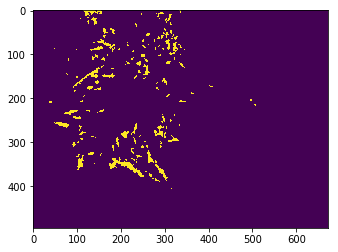

In [57]:
matlab_output_reshape = matlab_output_1[:,:,0]
for j in range(0,matlab_output_reshape.shape[1]-1):
    matlab_output_reshape[:,j] = matlab_output_reshape[:,j+1]
#Because I have a delay of 1 pixel in my image. I use matlab output and I cropped the figure not perfectly

matlab_output_reshape = matlab_output_reshape[12:matlab_output_reshape.shape[0]-12,12:matlab_output_reshape.shape[1]-13]
plt.figure()
plt.imshow(matlab_output_reshape)


Thresholding = matlab_output_reshape.reshape(333312)

Thresholding_f1_scores_app = f1_score(FV_Y_test, Thresholding , labels=[255], average=None)
Thresholding_Recall_scores_app = recall_score(FV_Y_test, Thresholding , labels=[255], average=None)
Thresholding_Precision_scores_app = precision_score(FV_Y_test, Thresholding , labels=[255], average=None)
print('The F1 score for the best Thresholding after Post-Processing = ', Thresholding_f1_scores_app)
print('Recall obtained for the best Thresholding after Post-Processing = ', Thresholding_Recall_scores_app)
print('Precision obtained for the best Thresholding after Post-Processing  = ', Thresholding_Precision_scores_app)



### Cell 6: Display of the ML algorithms defore last step of Post-Processing and after Post-Processing

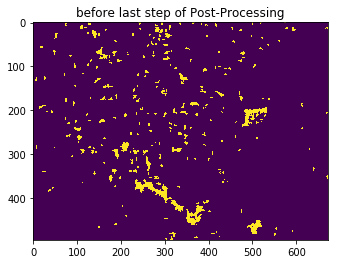

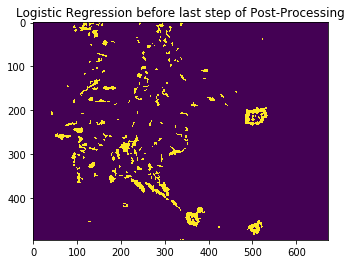

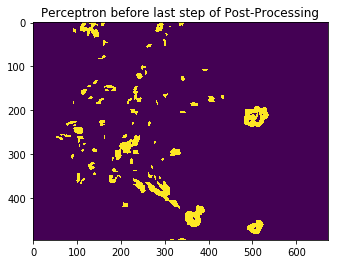

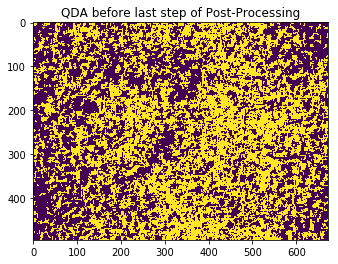

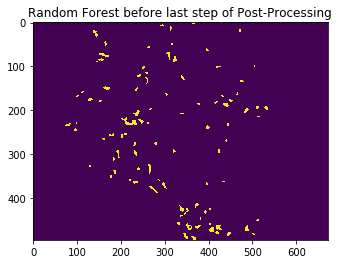

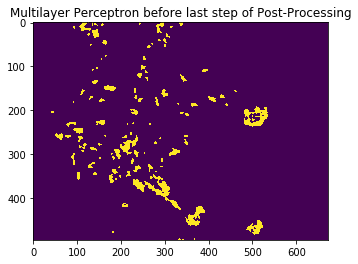

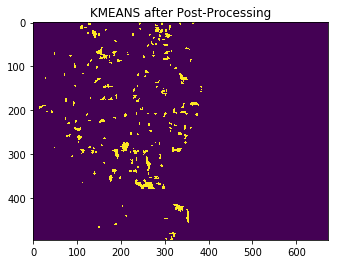

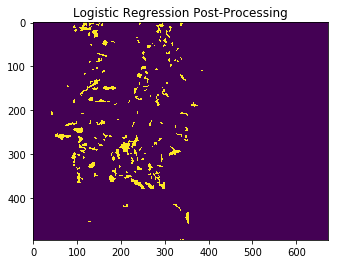

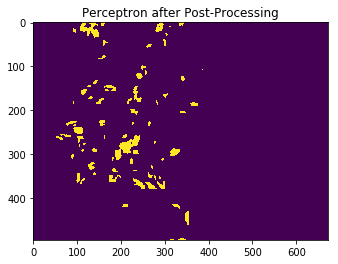

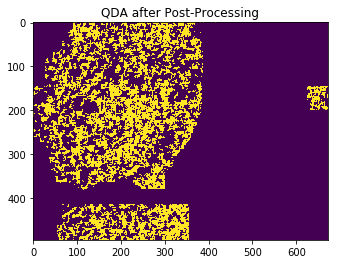

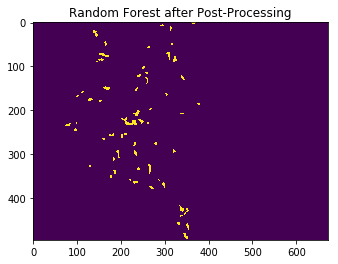

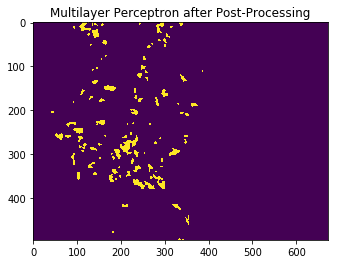

In [58]:
KMEANS_labels_reduced_binarized = KMEANS_labels_reduced_binarized.reshape(496,672)
Logistic_Regression_labels_reduced_binarized = Logistic_Regression_labels_reduced_binarized.reshape(496,672)
Perceptron_labels_reduced_binarized = Perceptron_labels_reduced_binarized.reshape(496,672)
QDA_labels_reduced_binarized = QDA_labels_reduced_binarized.reshape(496,672)
Random_Forest_labels_reduced_binarized  = Random_Forest_labels_reduced_binarized.reshape(496,672)
Multilayer_Perceptron_labels_reduced_binarized = Multilayer_Perceptron_labels_reduced_binarized.reshape(496,672)


KMEANS_labels_reduced_2_binarized = KMEANS_labels_reduced_2_binarized.reshape(496,672)
Logistic_Regression_labels_reduced_2_binarized = Logistic_Regression_labels_reduced_2_binarized.reshape(496,672)
Perceptron_labels_reduced_2_binarized = Perceptron_labels_reduced_2_binarized.reshape(496,672)
QDA_labels_reduced_2_binarized = QDA_labels_reduced_2_binarized.reshape(496,672)
Random_Forest_labels_reduced_2_binarized  = Random_Forest_labels_reduced_2_binarized.reshape(496,672)
Multilayer_Perceptron_labels_reduced_2_binarized = Multilayer_Perceptron_labels_reduced_2_binarized.reshape(496,672)


plt.figure()
plt.title('before last step of Post-Processing')
plt.imshow(KMEANS_labels_reduced_binarized)
plt.figure()
plt.title('Logistic Regression before last step of Post-Processing')
plt.imshow(Logistic_Regression_labels_reduced_binarized)
plt.figure()
plt.title('Perceptron before last step of Post-Processing')
plt.imshow(Perceptron_labels_reduced_binarized)
plt.figure()
plt.title('QDA before last step of Post-Processing')
plt.imshow(QDA_labels_reduced_binarized)
plt.figure()
plt.title('Random Forest before last step of Post-Processing')
plt.imshow(Random_Forest_labels_reduced_binarized)
plt.figure()
plt.title('Multilayer Perceptron before last step of Post-Processing')
plt.imshow(Multilayer_Perceptron_labels_reduced_binarized)


plt.figure()
plt.title('KMEANS after Post-Processing')
plt.imshow(KMEANS_labels_reduced_2_binarized)
plt.figure()
plt.title('Logistic Regression Post-Processing')
plt.imshow(Logistic_Regression_labels_reduced_2_binarized)
plt.figure()
plt.title('Perceptron after Post-Processing')
plt.imshow(Perceptron_labels_reduced_2_binarized)
plt.figure()
plt.title('QDA after Post-Processing')
plt.imshow(QDA_labels_reduced_2_binarized)
plt.figure()
plt.title('Random Forest after Post-Processing')
plt.imshow(Random_Forest_labels_reduced_2_binarized)
plt.figure()
plt.title('Multilayer Perceptron after Post-Processing')
plt.imshow(Multilayer_Perceptron_labels_reduced_2_binarized)

## VI. Quantification

As researchers in biology need graphical interfaces, for identifing each degradation zone after processing Connected Components,  we can download our segmentation results into MATLAB and make the quantification in MATLAB. A beginning of quantification is already written in MATLAB : `code_thresholding_dynanottouched`. 